# PART B

### B. Perform an iHS scan of the whole X chromosome for at least three populations. Identify the 10 most significant regions and associated with genes as in A.

In [2]:
library(tidyverse)
library(rehh)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [59]:
get_coords  <- function(data){
    min  <- min(data$start1)
    max  <- max(data$end1)
    return(c(min, max))
}

In [2]:
res_scan_AF  <- read.csv("res_scan_AF.csv", sep = "\t", header = TRUE)
res_scan_WE  <- read.csv("res_scan_WE.csv", sep = "\t", header = TRUE)
res_scan_EA  <- read.csv("res_scan_EA.csv", sep = "\t", header = TRUE)

## Calculating iHS 

Discard focal markers with Minor Allele Frequency equal to or below 0.05 .
279774 markers discarded.
132118 markers remaining.
Discard focal markers with Minor Allele Frequency equal to or below 0.05 .
331505 markers discarded.
80387 markers remaining.


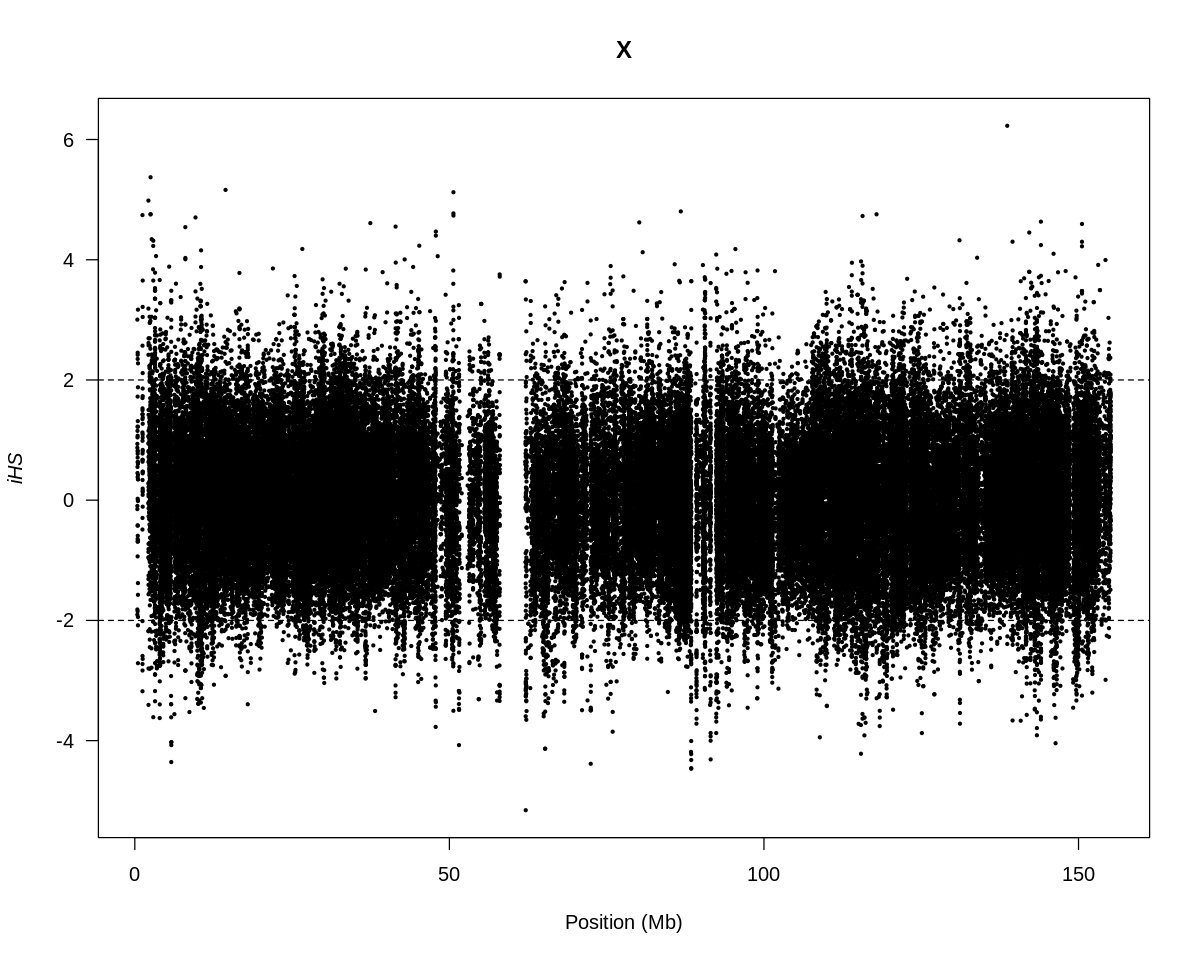

Discard focal markers with Minor Allele Frequency equal to or below 0.05 .
343097 markers discarded.
68795 markers remaining.


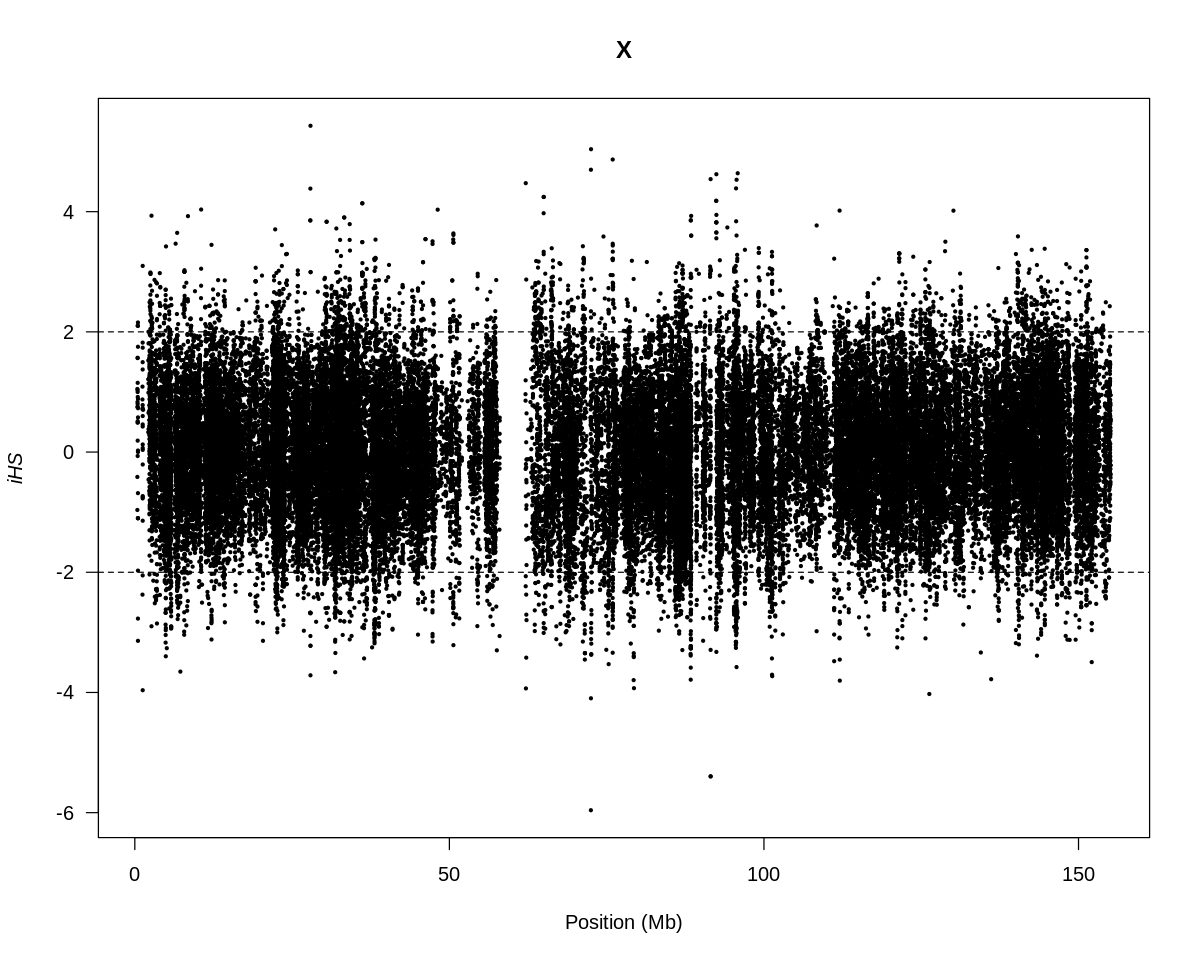

[1] 68795

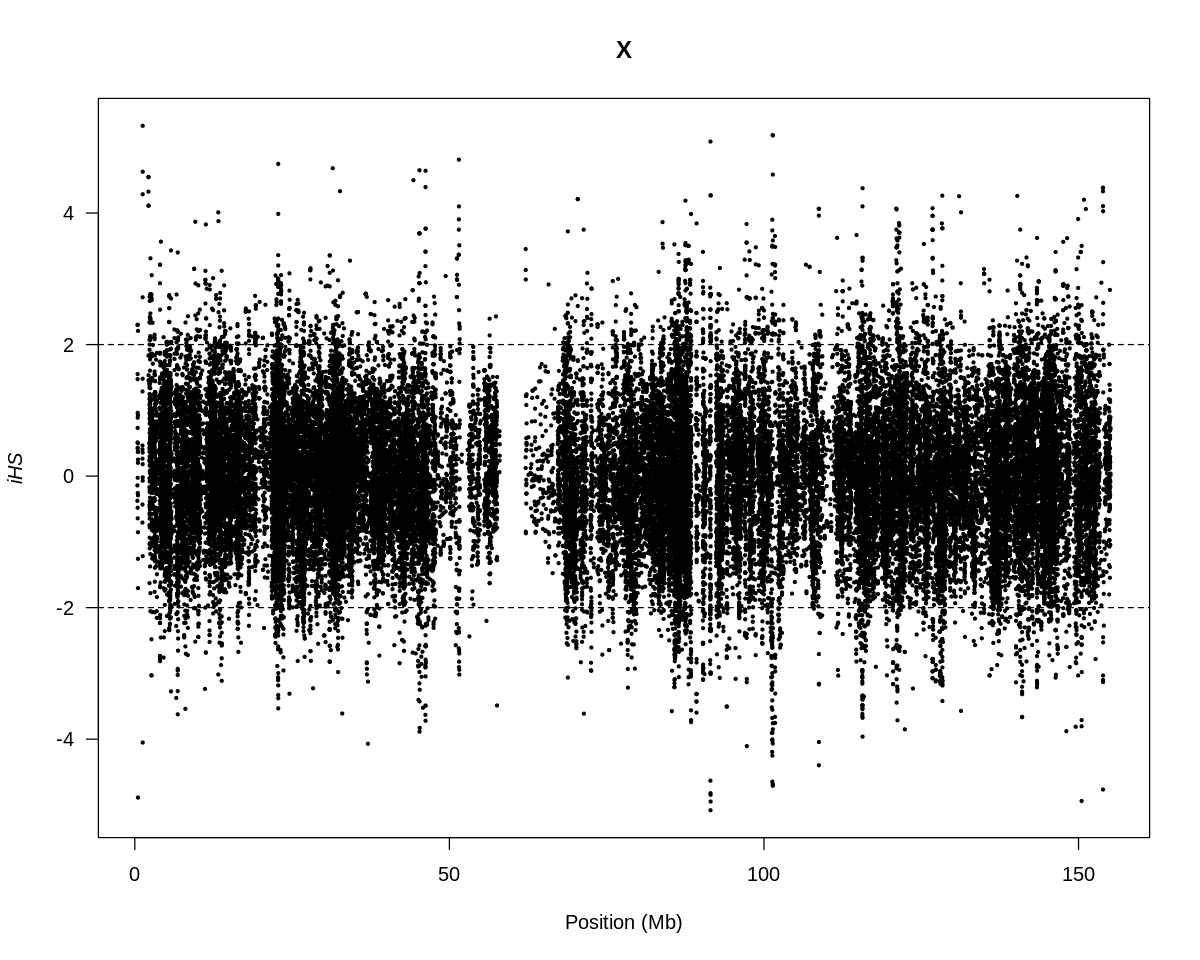

In [3]:
options(repr.plot.width=10, repr.plot.height=8)
# calculating the standardized? IHS for three populations - specify/look over the freqbin

ihs_AF <- ihh2ihs(res_scan_AF, freqbin = 0.05) 
manhattanplot(ihs_AF)

ihs_WE <- ihh2ihs(res_scan_WE, freqbin = 0.05) 
manhattanplot(ihs_WE)

ihs_EA <- ihh2ihs(res_scan_EA, freqbin = 0.05) 
manhattanplot(ihs_EA)
nrow(ihs_EA$ihs)

### Remove NA values

In [4]:
head(ihs_AF$ihs)
sum(is.na(ihs_AF$ihs$IHS))
ihs_AF  <- ihs_AF$ihs  %>% filter(!is.na(IHS))
head(ihs_AF)

head(ihs_WE$ihs)
sum(is.na(ihs_WE$ihs$IHS))
ihs_WE  <- ihs_WE$ihs  %>% filter(!is.na(IHS))
head(ihs_WE)

head(ihs_EA$ihs)
sum(is.na(ihs_EA$ihs$IHS))
ihs_EA  <- ihs_EA$ihs  %>% filter(!is.na(IHS))
head(ihs_EA)

,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
4,X,400132,NA,NA
6,X,400303,NA,NA
9,X,401651,NA,NA
17,X,401893,NA,NA
18,X,401894,NA,NA
23,X,403395,NA,NA


[1] 24

,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,403610,0.87271236,0.41700552
2,X,404457,-0.09532002,0.03429953
3,X,404868,-1.90346960,1.24428291
4,X,405007,3.00426691,2.57475661
5,X,405151,-1.81832218,1.16105710
6,X,406041,-0.14854780,0.05457550


,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
3,X,400108,NA,NA
6,X,400303,NA,NA
9,X,401651,NA,NA
17,X,401893,NA,NA
18,X,401894,NA,NA
23,X,403395,NA,NA


[1] 39

,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,403946,-0.4137125,0.1680761
2,X,403978,-0.9634386,0.4745309
3,X,404457,1.0498643,0.5319770
4,X,425637,0.7471815,0.3420325
5,X,426374,0.8341456,0.3934048
6,X,446343,0.7560065,0.3471299


,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
3,X,400108,NA,NA
6,X,400303,NA,NA
9,X,401651,NA,NA
12,X,401840,NA,NA
13,X,401857,NA,NA
17,X,401893,NA,NA


[1] 33

,CHR,POSITION,IHS,LOGPVALUE
,<chr>,<int>,<dbl>,<dbl>
1,X,404868,-0.3760291,0.15064494
2,X,406041,-0.1418604,0.05198323
3,X,425637,0.5128142,0.21603836
4,X,446343,0.7330610,0.33393039
5,X,446457,0.4228052,0.17234812
6,X,446526,1.5514620,0.91796543


### Plot the distributions of the iHS values

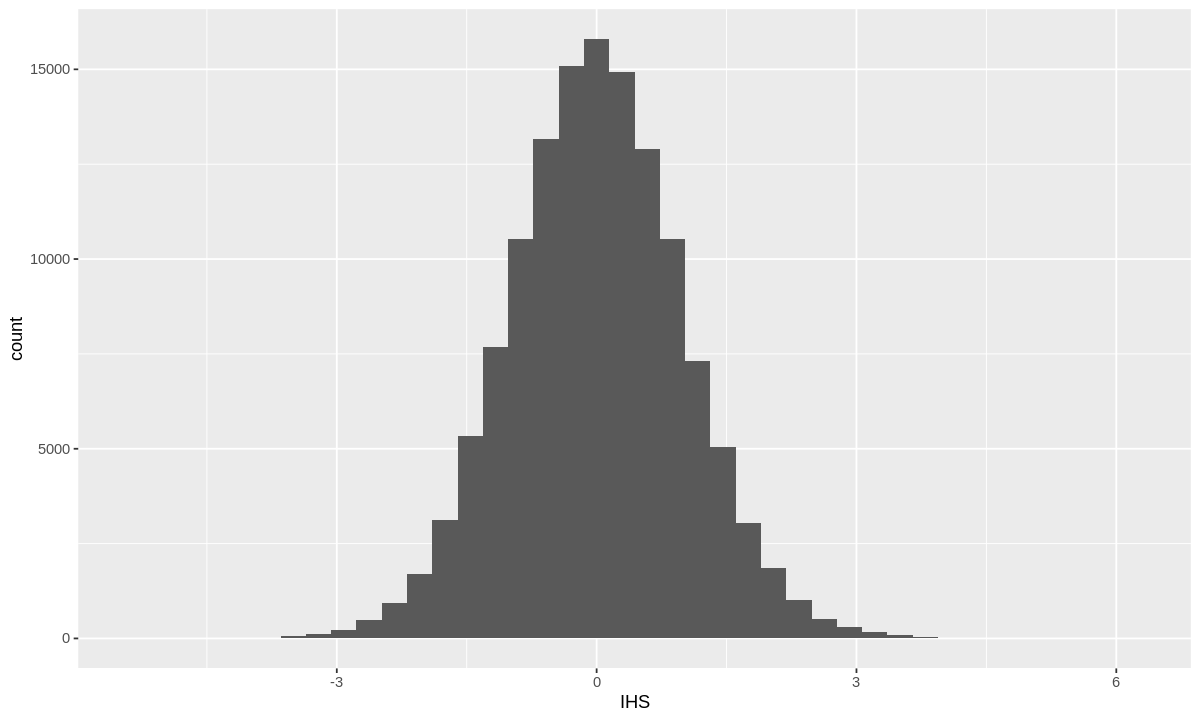

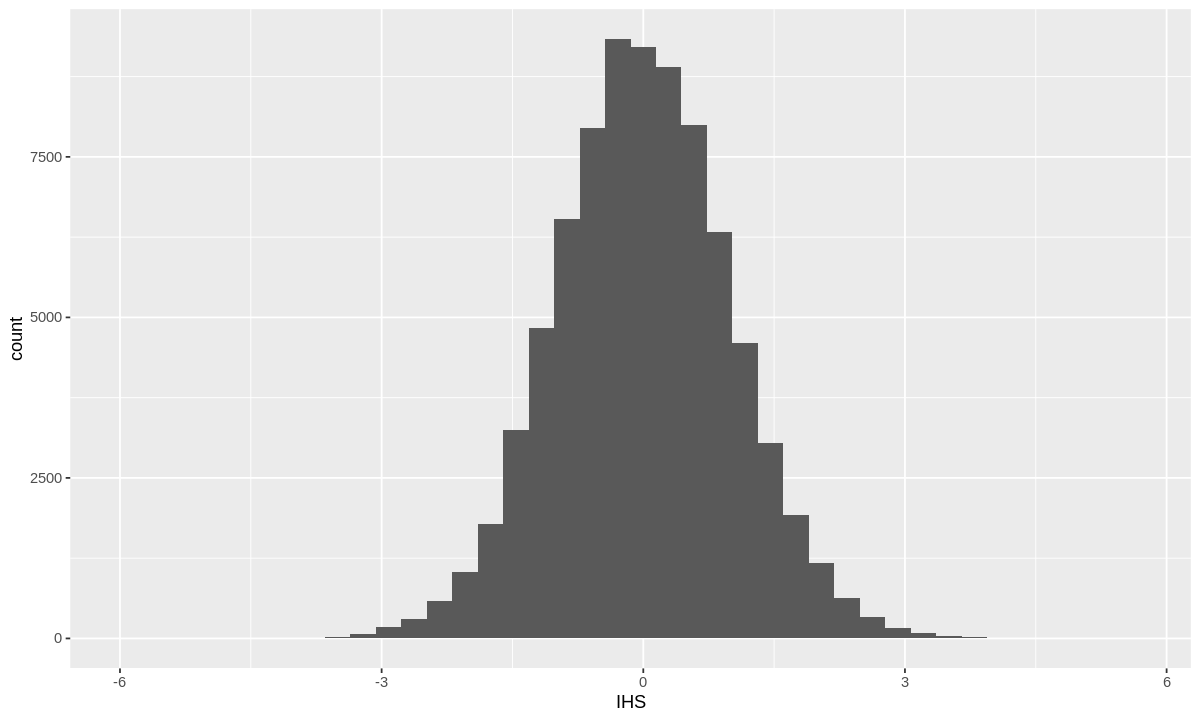

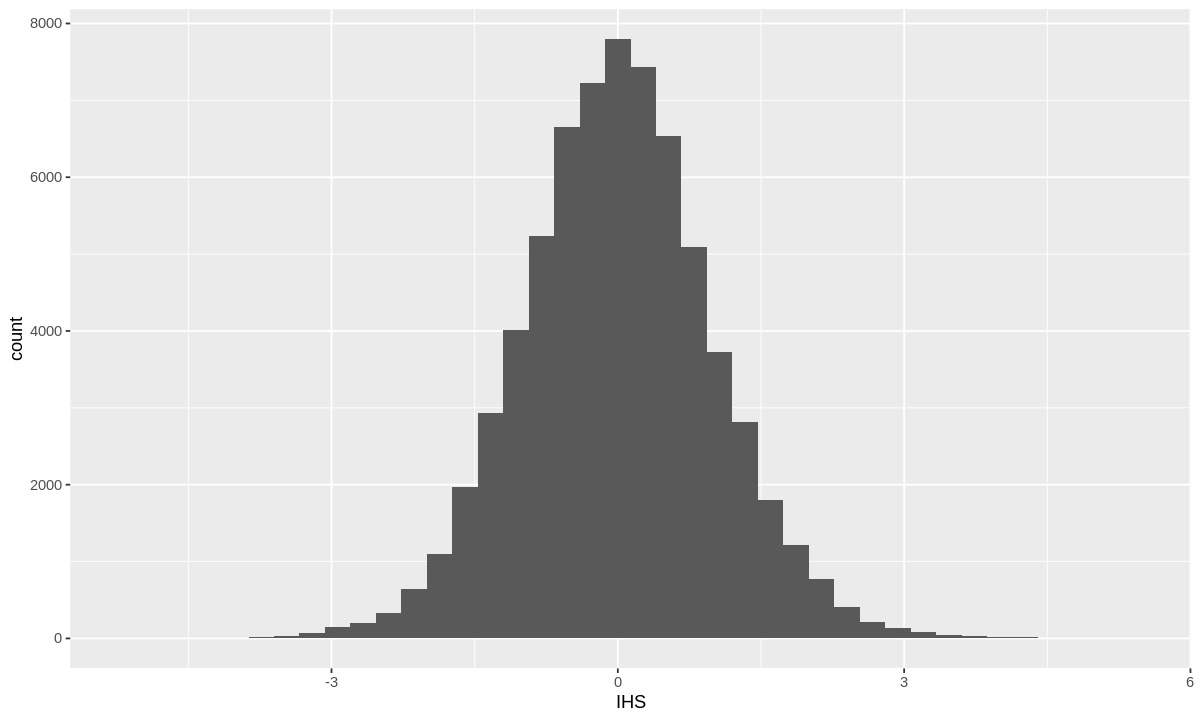

In [5]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(ihs_AF) + geom_histogram(aes(x = IHS), bins = 40)
ggplot(ihs_WE) + geom_histogram(aes(x = IHS), bins = 40)
ggplot(ihs_EA) + geom_histogram(aes(x = IHS), bins = 40)

## Find a threshold 

In [6]:
n_signif_AF  <- nrow(ihs_AF  %>% filter(abs(IHS) >= 2))
prop_signif_AF  <- n_signif_AF*100/nrow(ihs_AF)
print(prop_signif_AF)

n_signif_WE  <- nrow(ihs_WE  %>% filter(abs(IHS) >= 2))
prop_signif_WE  <- n_signif_WE*100/nrow(ihs_WE)
print(prop_signif_WE)

n_signif_EA  <- nrow(ihs_EA  %>% filter(abs(IHS) >= 2))
prop_signif_EA  <- n_signif_EA*100/nrow(ihs_EA)
print(prop_signif_EA)


[1] 4.617924
[1] 4.6896
[1] 4.695908


### Function to summarize the iHS values in 100 SNP windows

In [7]:
ihs_in_sliding_windows <- function(ihs_data, window_size = 100){
    chr = NULL
    first_snp_pos = NULL
    last_snp_pos = NULL
    avg_ihs = NULL
    prop_signif = NULL
    print("here")
    ws_ = window_size - 1

    for (i in 1:(nrow(ihs_data) - ws_)){
        chr[i] <- ihs_data$CHR[i]
        first_snp_pos[i] <- ihs_data$POSITION[i]
        last_snp_pos[i] <- ihs_data$POSITION[i + ws_]
        subset <- ihs_data %>% filter(between(POSITION, first_snp_pos[i], last_snp_pos[i]))
        prop_signif[i]  <- nrow(subset  %>% filter(abs(IHS) >= 2))
        avg_ihs[i] <- mean(subset$IHS)                              
    }

    ihs  <- tibble(chr =  chr,
                   first_snp_pos = first_snp_pos, 
                   last_snp_pos = last_snp_pos, 
                   prop_signif = prop_signif,
                   avg_ihs = avg_ihs)
    return(ihs)
}


In [8]:
# Africa
print("Africa")
windows_ihs_AF  <- ihs_in_sliding_windows(ihs_AF)
write_delim(windows_ihs_AF, "windows_ihs_AF.csv", delim = "\t", col_names = TRUE)

# WestEurasia
print("WestEurasia")
windows_ihs_WE  <- ihs_in_sliding_windows(ihs_WE)
write_delim(windows_ihs_WE, "windows_ihs_WE.csv", delim = "\t", col_names = TRUE)

#EastAsia
print("EastAsia")
windows_ihs_EA <- ihs_in_sliding_windows(ihs_EA)
write_delim(windows_ihs_EA, "windows_ihs_EA.csv", delim = "\t", col_names = TRUE)

[1] "Africa"
[1] "here"
[1] "WestEurasia"
[1] "here"
[1] "EastAsia"
[1] "here"


In [10]:
windows_ihs_AF <- read.table("windows_ihs_AF.csv", header = TRUE, sep = '\t')
head(windows_ihs_AF)

windows_ihs_WE <- read.table("windows_ihs_WE.csv", header = TRUE, sep = '\t')
head(windows_ihs_WE)

windows_ihs_EA <- read.table("windows_ihs_EA.csv", header = TRUE, sep = '\t')
head(windows_ihs_EA)

,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,403610,2166015,23,0.5329636
2,X,404457,2168356,23,0.5111188
3,X,404868,2168827,23,0.5227308
4,X,405007,2169093,24,0.5199767
5,X,405151,2169194,24,0.4681452
6,X,406041,2173272,24,0.4957250


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,403946,2343613,12,0.3600036
2,X,403978,2347088,12,0.3576605
3,X,404457,2347212,12,0.3608147
4,X,425637,2347246,12,0.3438358
5,X,426374,2347519,12,0.3394551
6,X,446343,2348588,12,0.3453019


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,404868,2373688,18,0.6805646
2,X,406041,2373713,18,0.6894524
3,X,425637,2376373,18,0.6890712
4,X,446343,2377686,18,0.6816793
5,X,446457,2377798,18,0.6668331
6,X,446526,2379214,18,0.6744868


## Plot the distributions of the 1) averaged; 2) n of significant iHS values in windows

### Africa - 500 genes is approximately 0.38% of the data

[1] 131995

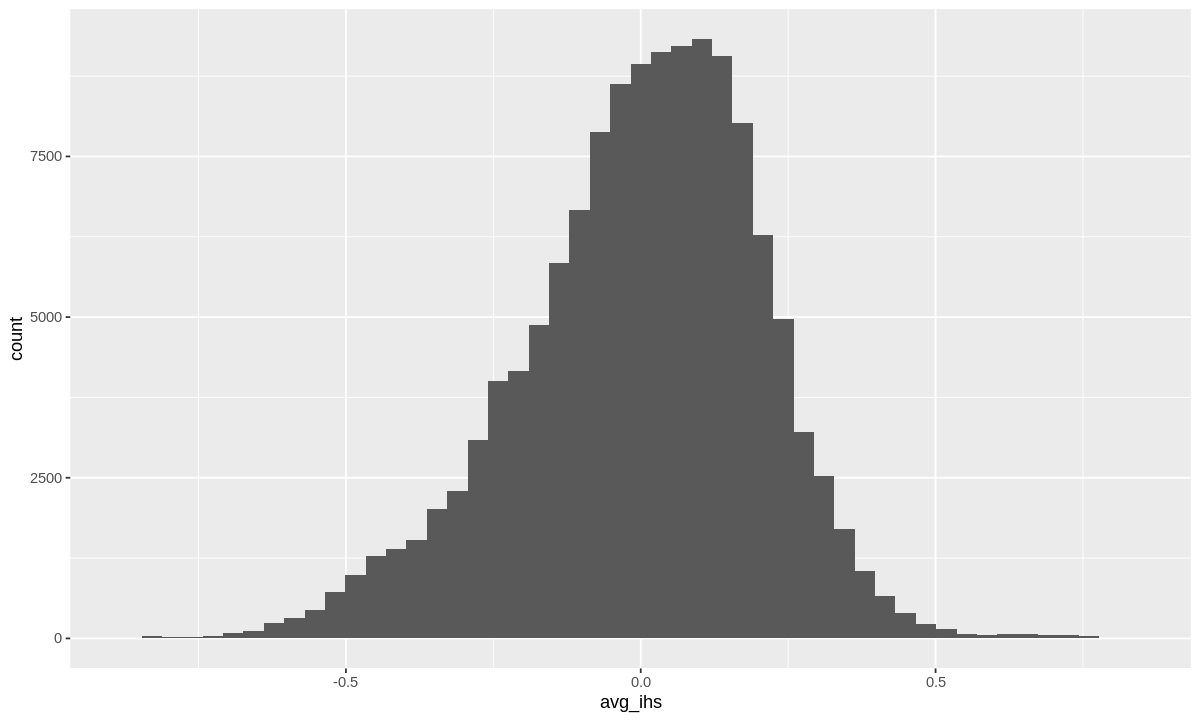

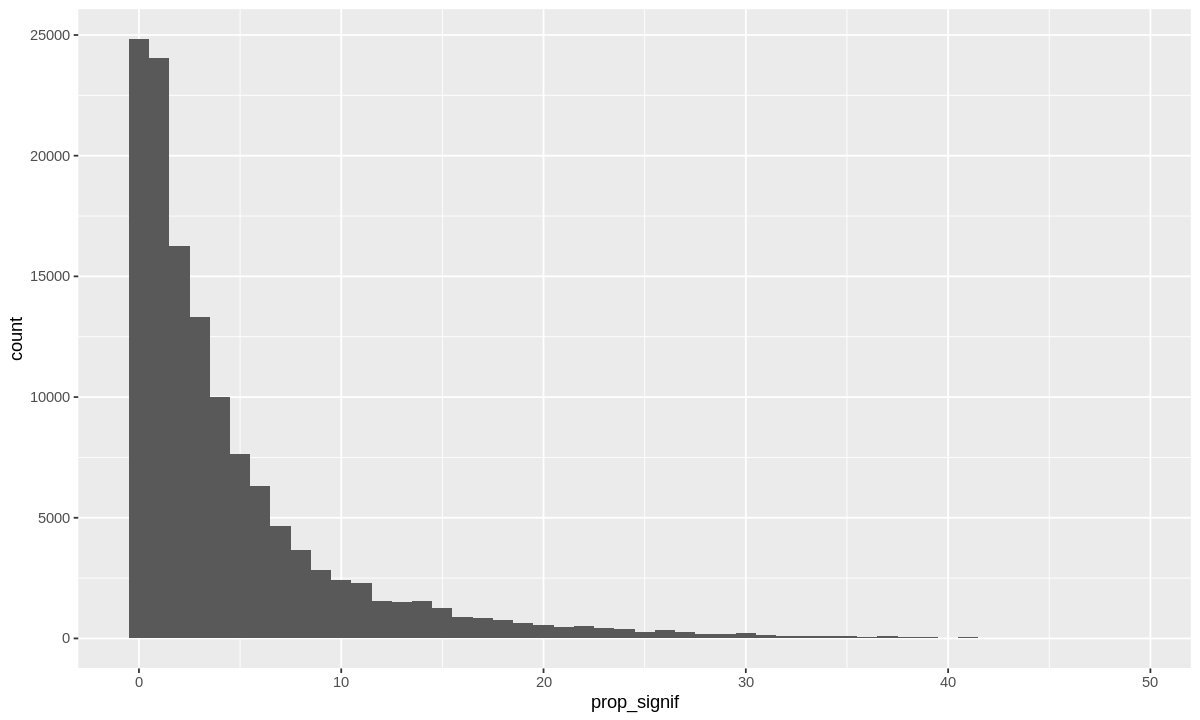

In [12]:
options(repr.plot.width=10, repr.plot.height=6)
nrow(windows_ihs_AF)
ggplot(windows_ihs_AF) + geom_histogram(aes(x = avg_ihs), bins = 50)
ggplot(windows_ihs_AF) + geom_histogram(aes(x = prop_signif), bins = 50)

In [10]:
#131995 - 100%
#x - 5%

x  = (131995*5)/100
print(x)

x  = (131995*0.38)/100
print(x)

[1] 6599.75
[1] 501.581


### WestEurasia - 500 genes is approximately 0.625 of the data

[1] 80249

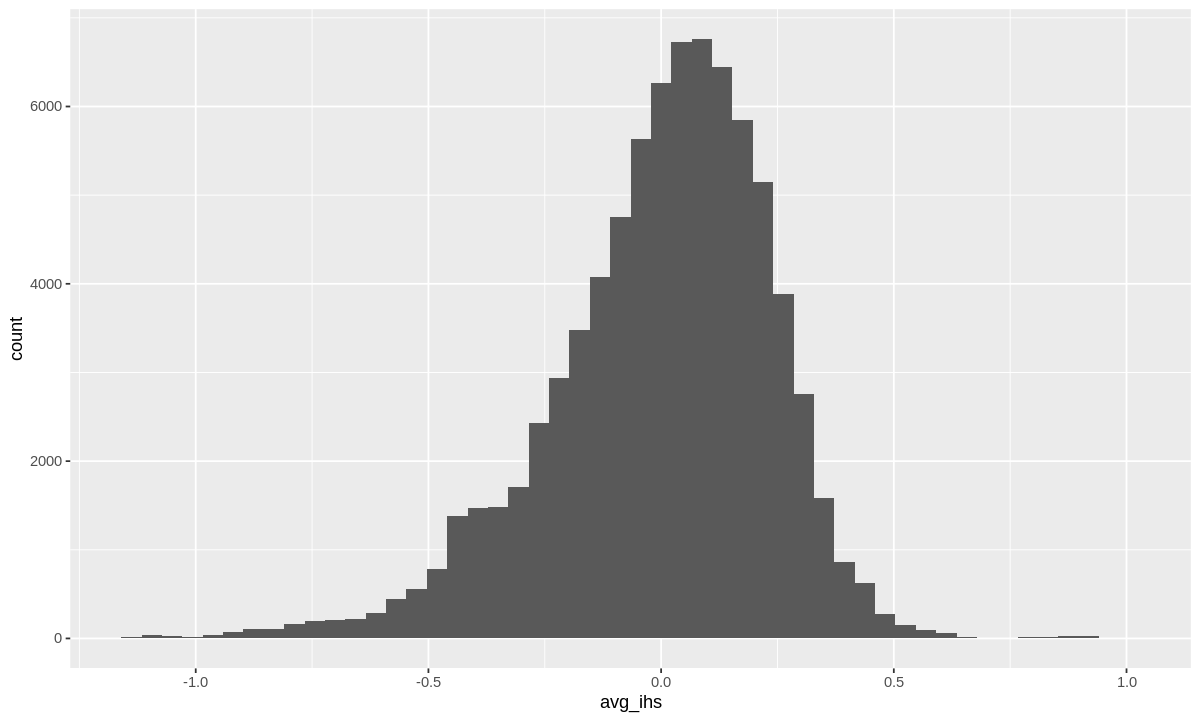

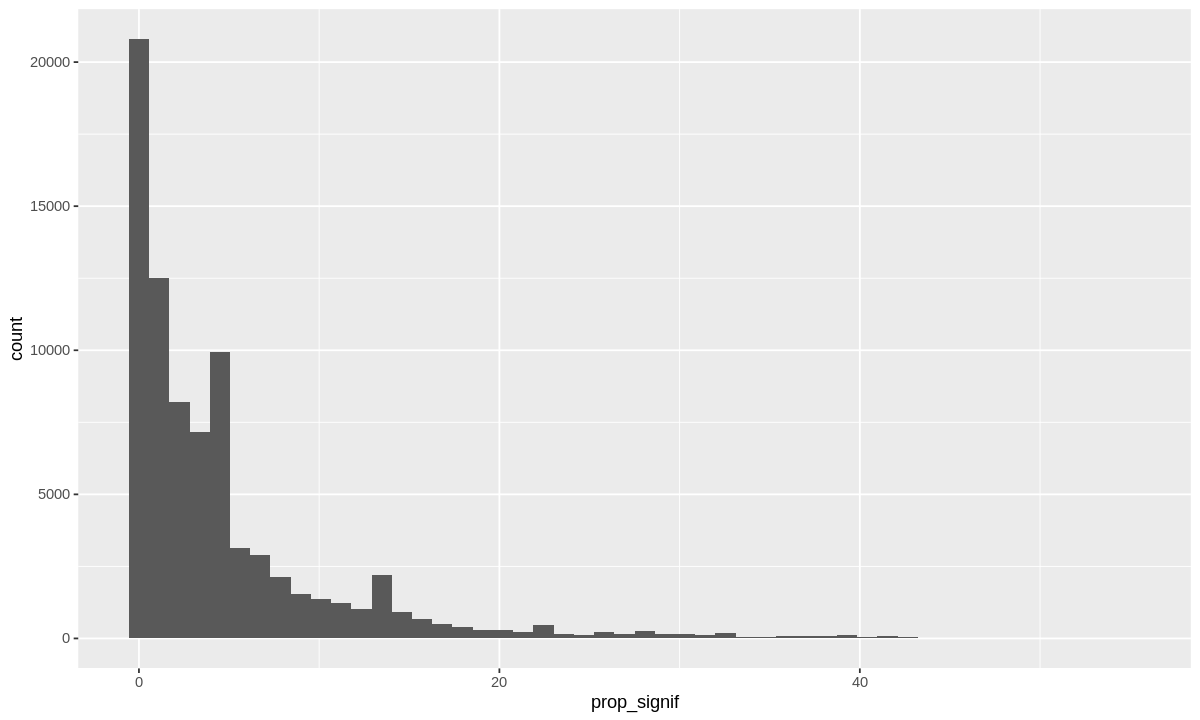

In [13]:
options(repr.plot.width=10, repr.plot.height=6)
nrow(windows_ihs_WE)
ggplot(windows_ihs_WE) + geom_histogram(aes(x = avg_ihs), bins = 50)
ggplot(windows_ihs_WE) + geom_histogram(aes(x = prop_signif), bins = 50)

In [12]:
# 80249 - 100%
# x - 5%

x = (80249*5)/100
print(x)

x = (80249*0.625)/100
print(x)

[1] 4012.45
[1] 501.5562


### EastAsia - 500 genes is approximately 0.73% of the data

[1] 68663

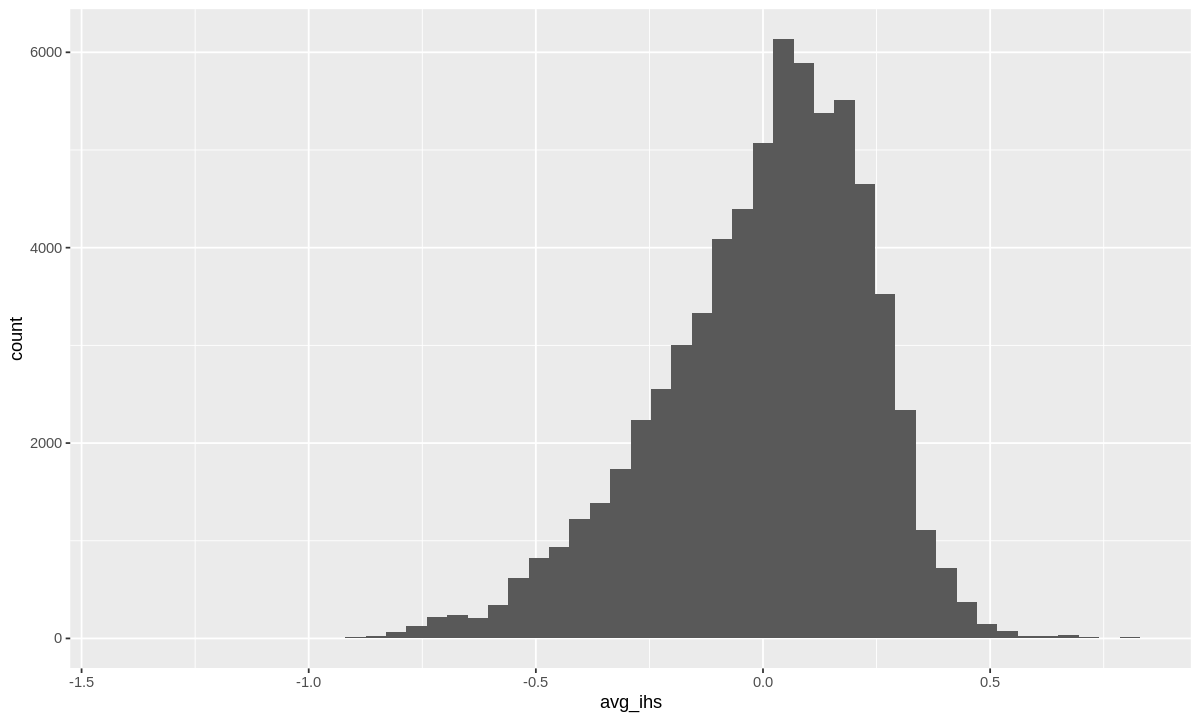

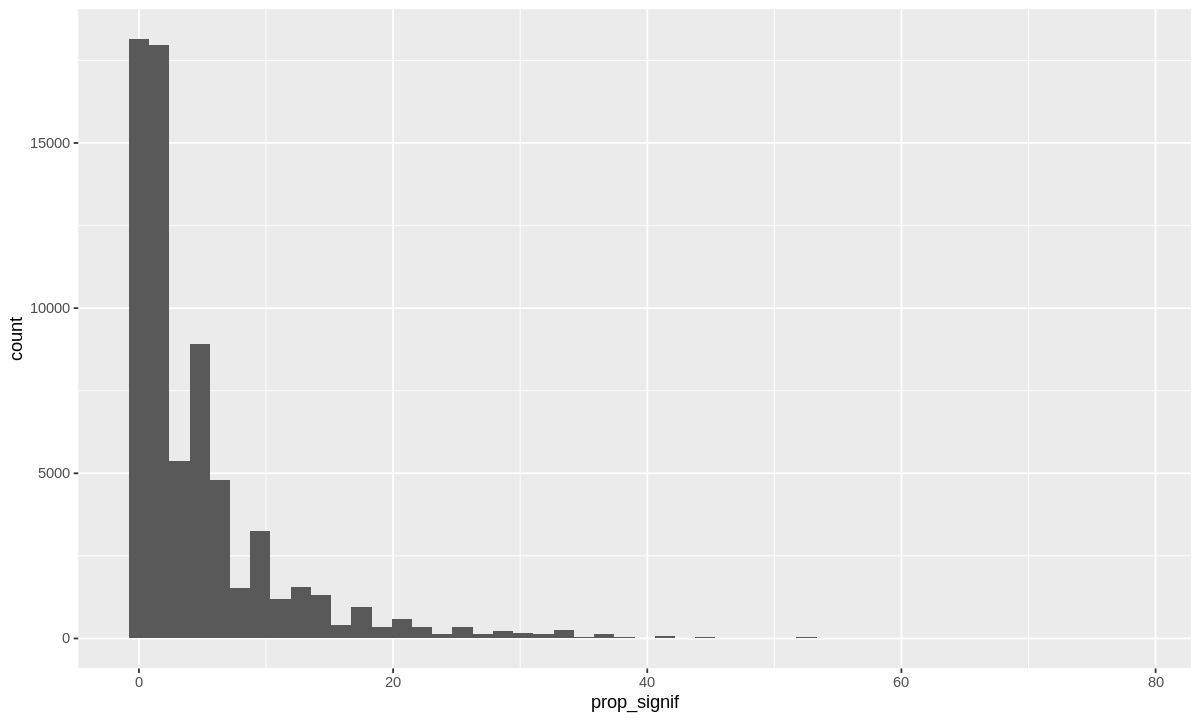

In [14]:
options(repr.plot.width=10, repr.plot.height=6)
nrow(windows_ihs_EA)
ggplot(windows_ihs_EA) + geom_histogram(aes(x = avg_ihs), bins = 50)
ggplot(windows_ihs_EA) + geom_histogram(aes(x = prop_signif), bins = 50)

In [14]:
#68663 - 100%
# x - 5%

x = (68663*5)/100
print(x)

x = (68663*0.73)/100
print(x)

[1] 3433.15
[1] 501.2399


## Analyze significant iHS values Africa

[1] 250

[1] 250

[1] 500


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,chrX,143382218,143437898,26,0.8158277
2,chrX,143381963,143437694,26,0.8088637
3,chrX,143382601,143438395,26,0.7968356
4,chrX,143381718,143436642,27,0.7765224
5,chrX,143380347,143435641,30,0.7754613
6,chrX,143382774,143438828,25,0.7713701


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,90605249,90662976,49,0.3952562
2,X,90605728,90666555,48,0.3809909
3,X,90604974,90662034,48,0.3797349
4,X,90580349,90625933,48,0.3743969
5,X,90604712,90661986,48,0.3567794
6,X,90604699,90661242,48,0.3338240


[1] 131995

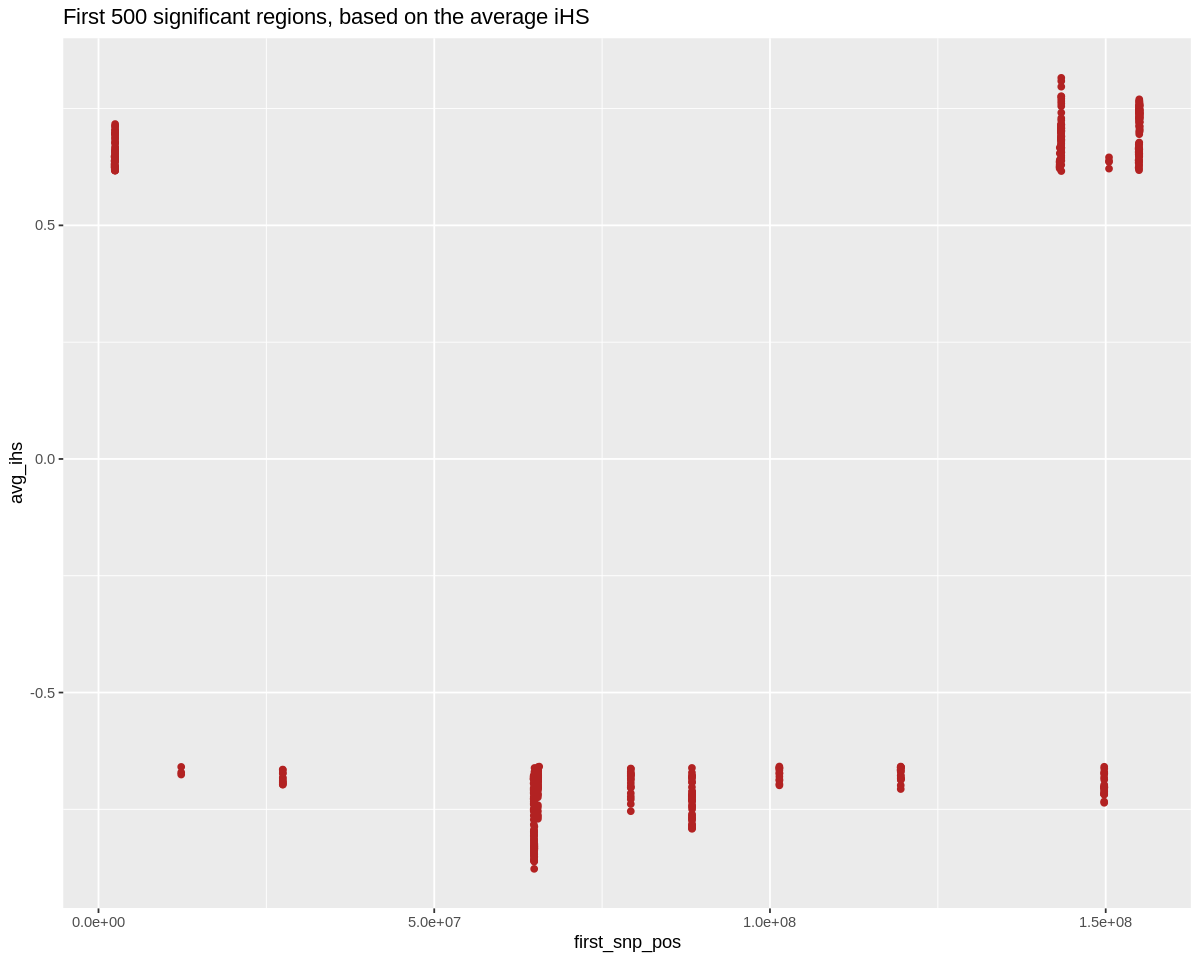

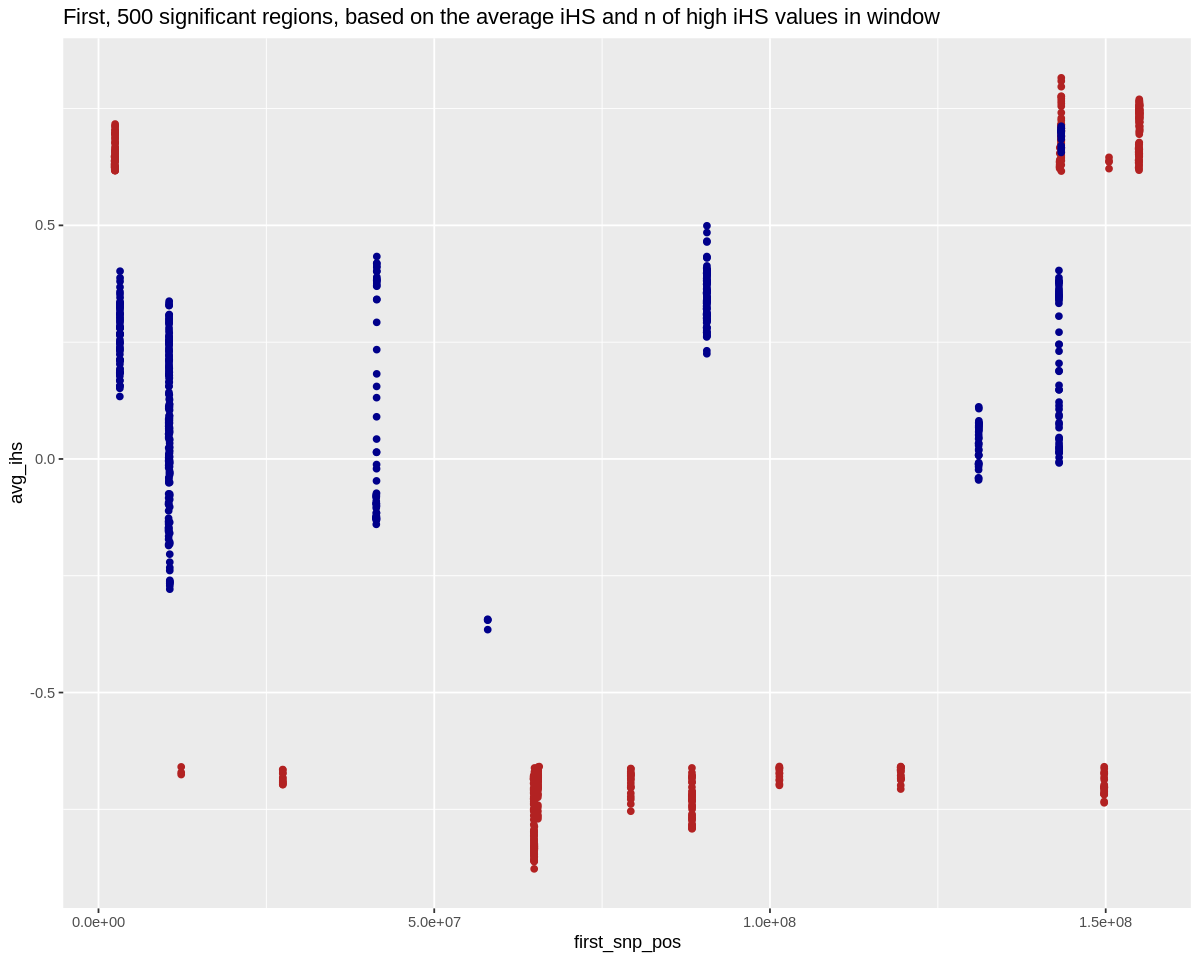

In [70]:
options(repr.plot.width=10, repr.plot.height=8)

windows_ihs_AF <- windows_ihs_AF %>% arrange(desc(avg_ihs))
mean_ihs_AF_high  <- windows_ihs_AF[1:250, ]  
nrow(mean_ihs_AF_high)

mean_ihs_AF_low   <- windows_ihs_AF[(nrow(windows_ihs_AF)-249):nrow(windows_ihs_AF), ]
nrow(mean_ihs_AF_low)

mean_ihs_AF_sign  <- bind_rows(mean_ihs_AF_high, mean_ihs_AF_low)
print(nrow(mean_ihs_AF_sign))

#write bed file for annotating genes
mean_ihs_AF_sign <- mean_ihs_AF_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_ihs_AF_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
write_delim(mean_ihs_AF_sign, "mean_ihs_AF_sign_500.bed", delim = "\t", col_names = FALSE)



#find the 500 most significant regions based on the number of absolute iHS values in the window that are higher than 2
windows_ihs_AF <- windows_ihs_AF  %>% arrange(desc(prop_signif))

prop_signif_ihs_AF_high <- windows_ihs_AF[1:500, ]  

#write bed file for annotating genes
prop_signif_ihs_AF_high <- prop_signif_ihs_AF_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_ihs_AF_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
write_delim(prop_signif_ihs_AF_high, "prop_signif_ihs_AF_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_ihs_AF_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average iHS")

ggplot() + geom_point(data = mean_ihs_AF_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
        geom_point(data = prop_signif_ihs_AF_high, aes(x = first_snp_pos, y = avg_ihs), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average iHS and n of high iHS values in window")


## Annotating genes in the siginficant regions iHS,  Africa

[1] 1013

[1] 46

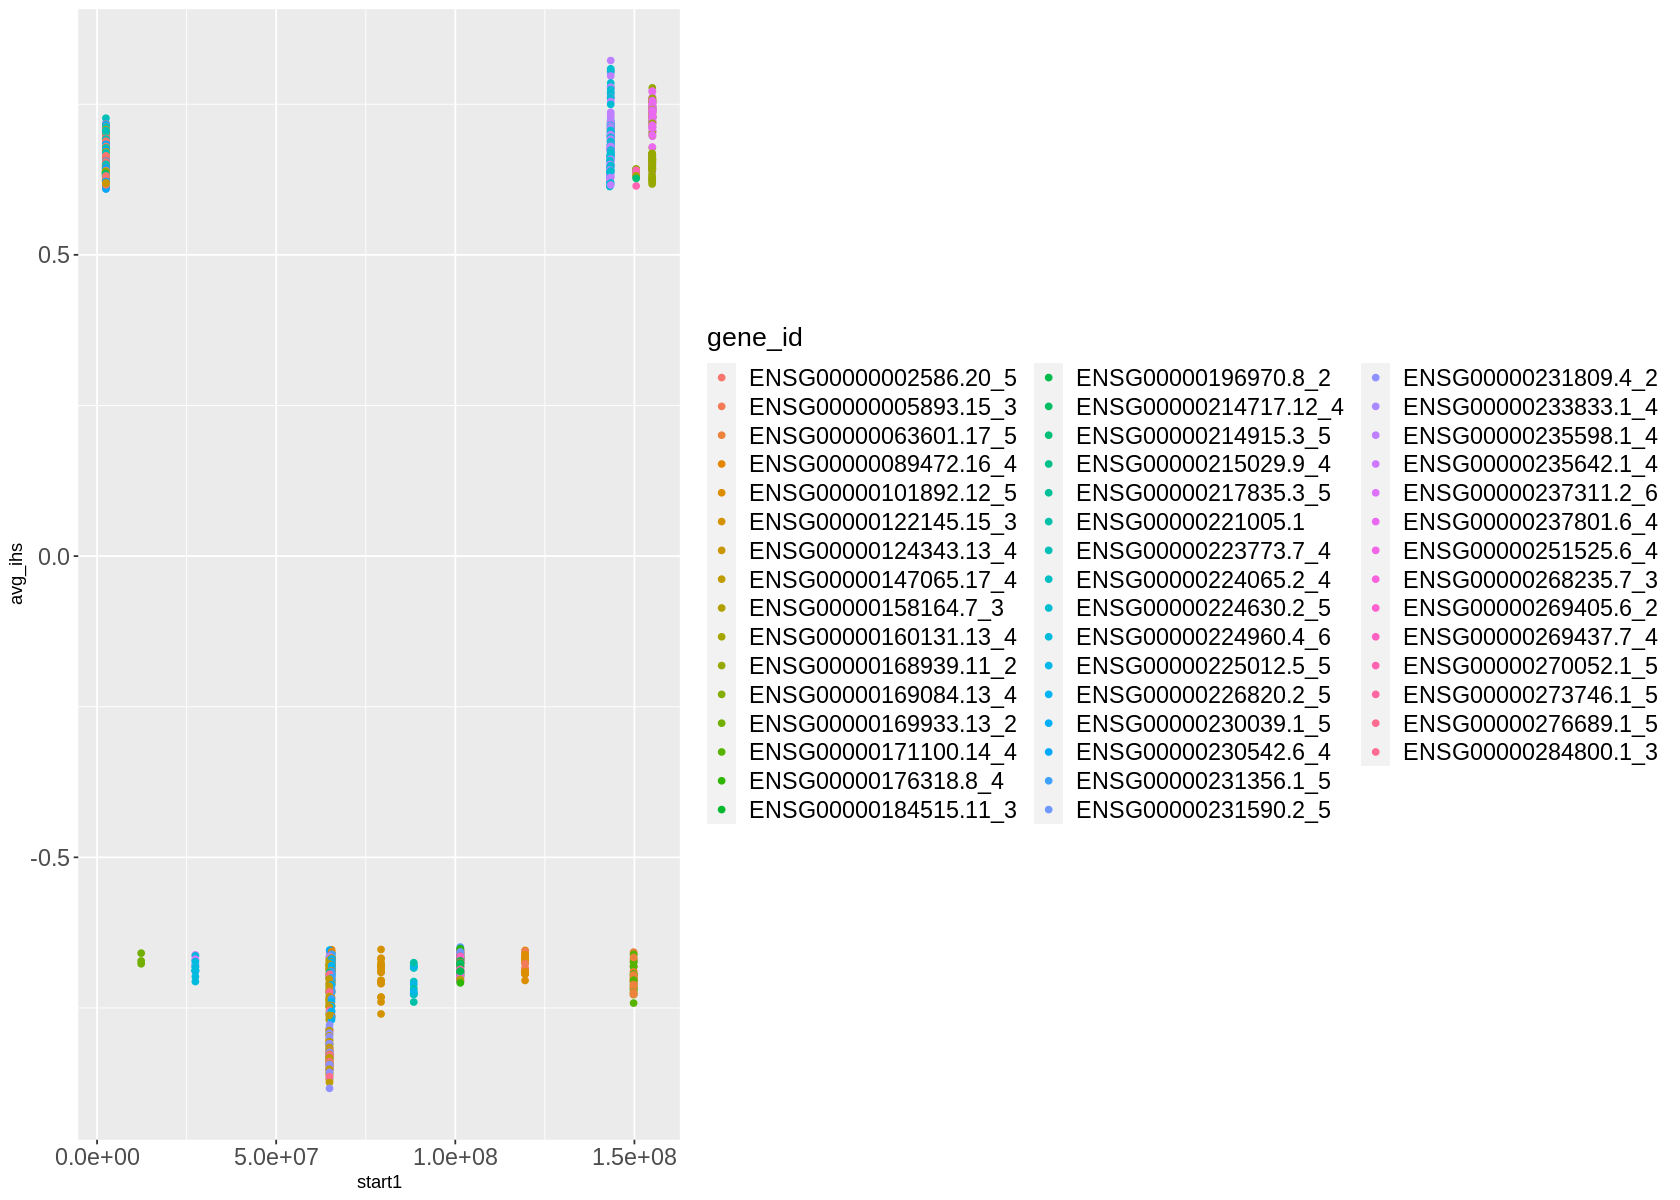

In [17]:
# Based on the mean iHS 

options(repr.plot.width=14, repr.plot.height=10)

mean_ihs_AF_sign_500_genes <- read.table("mean_ihs_AF_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_ihs_AF_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")



mean_ihs_AF_sign_500_genes  <- mean_ihs_AF_sign_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(mean_ihs_AF_sign_500_genes)


ggplot() + geom_jitter(data = mean_ihs_AF_sign_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_AF_mean_ihs  <- (unique(mean_ihs_AF_sign_500_genes[c("gene_id")]))
nrow(gene_names_AF_mean_ihs)

write_delim(gene_names_AF_mean_ihs, "gene_names_AF_mean_ihs.csv", delim = "\t", col_names = TRUE)

[1] 124


[1] 1052

,chr1,start1,end1,prop_signif,avg_ihs,chr2,start2,end2,gene_id,overlap
,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<int>
1,chrX,90609049,90686863,47,0.4049127,chrX,90673782,90673870,ENSG00000234161.1_5,88
2,chrX,90609049,90686863,47,0.4049127,chrX,90677307,90677537,ENSG00000236413.2_5,230
3,chrX,90606626,90672924,47,0.4028353,chrX,90669876,90670048,ENSG00000234161.1_5,172
4,chrX,90608968,90685734,47,0.3791047,chrX,90673782,90673870,ENSG00000234161.1_5,88
5,chrX,90608968,90685734,47,0.3791047,chrX,90677307,90677537,ENSG00000236413.2_5,230
6,chrX,90608930,90683065,47,0.3765851,chrX,90673782,90673870,ENSG00000234161.1_5,88


[1] 31

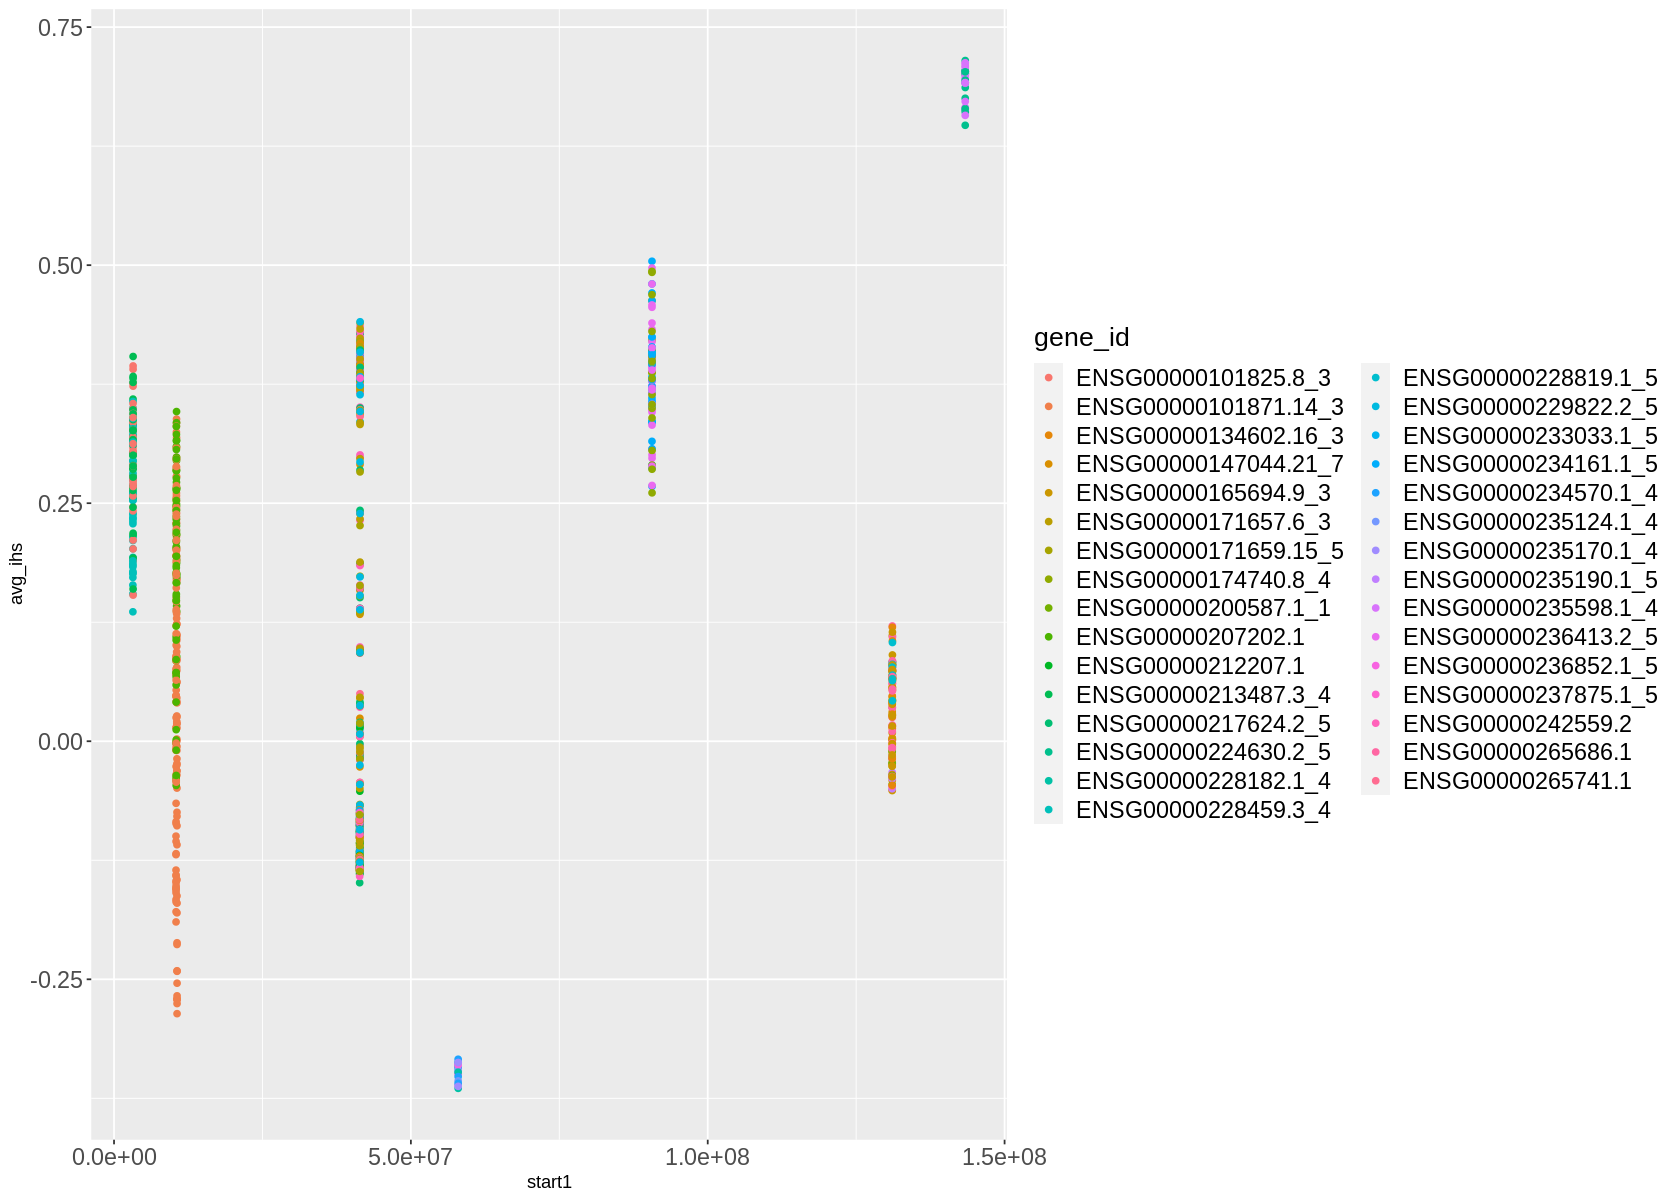

In [30]:
# Based on the number of significant iHS values in window

options(repr.plot.width=14, repr.plot.height=10)

prop_signif_ihs_AF_high_500_genes <- read.table("prop_signif_ihs_AF_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_ihs_AF_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_ihs_AF_high_500_genes  %>% filter(overlap == 0)))

prop_signif_ihs_AF_high_500_genes  <- prop_signif_ihs_AF_high_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)


ggplot() + 
    geom_jitter(data = prop_signif_ihs_AF_high_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_AF_n_signif_ihs <- (unique(prop_signif_ihs_AF_high_500_genes[c("gene_id")]))
nrow(gene_names_AF_n_signif_ihs)

write_delim(gene_names_AF_n_signif_ihs, "gene_names_AF_n_signif_ihs.csv", delim = "\t", col_names = TRUE)

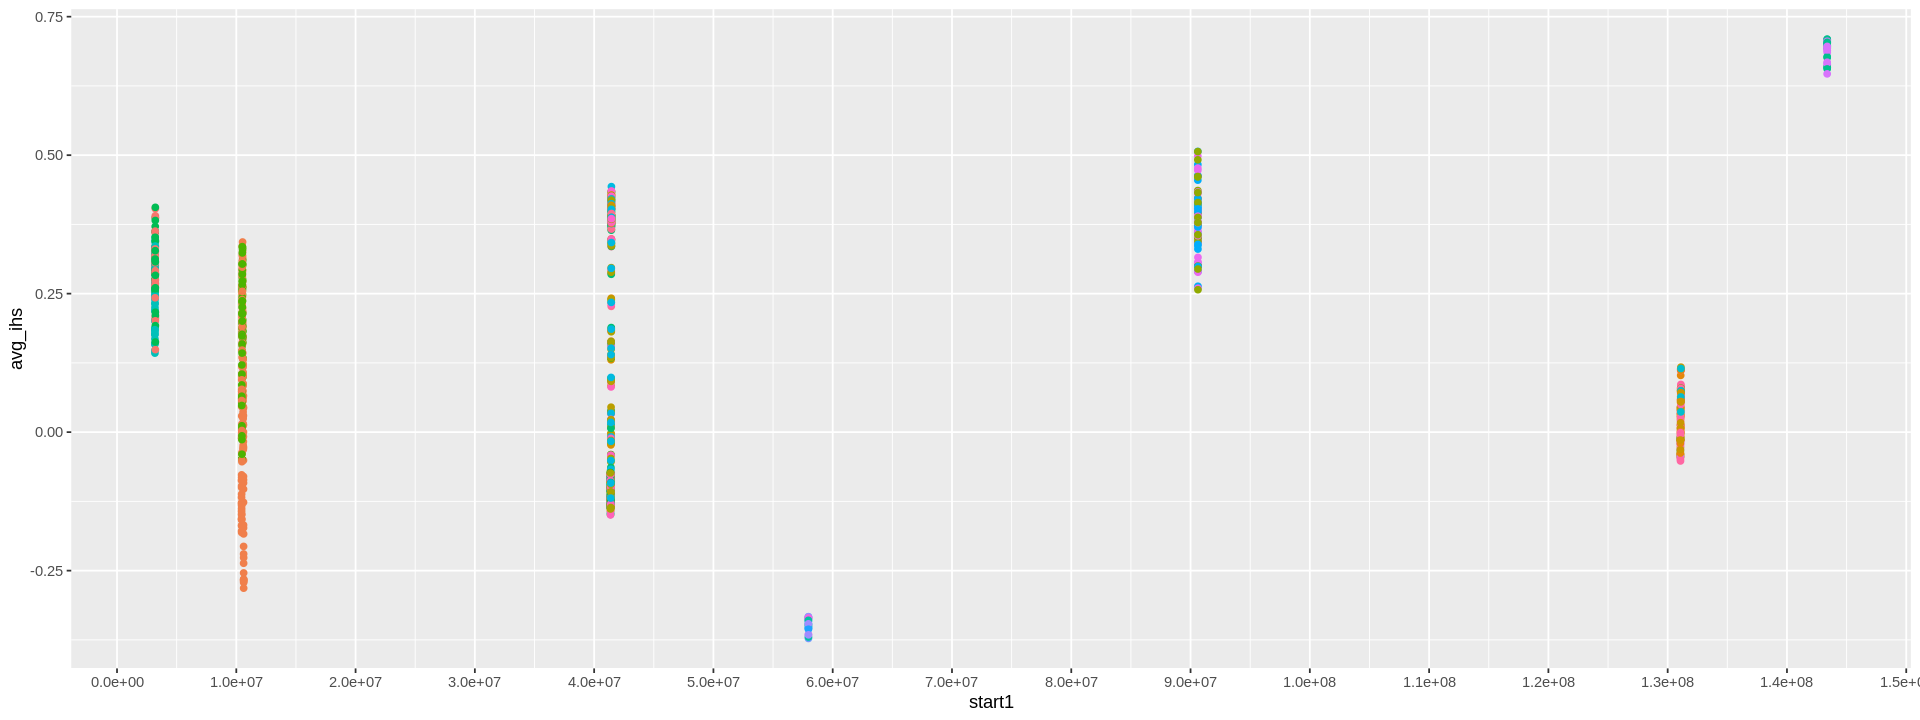

In [55]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot() + 
    geom_jitter(data = prop_signif_ihs_AF_high_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))

### Get the genomic coordinates and genes

In [61]:
subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 0, 0.5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 0.5e+07, 2e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 3e+07, 5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 5e+07, 6e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 8e+07, 1e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 1.2e+08, 1.4e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_AF_high_500_genes  %>% filter(between(start1, 1.4e+08, 1.5e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

[1] 3173539 3397661


,gene_id
,<chr>
1,ENSG00000228459.3_4
2,ENSG00000101825.8_3
3,ENSG00000213487.3_4


[1] 10437792 10717720


,gene_id
,<chr>
1,ENSG00000101871.14_3
11,ENSG00000207202.1


[1] 41361670 41680173


,gene_id
,<chr>
1,ENSG00000147044.21_7
2,ENSG00000265741.1
3,ENSG00000217624.2_5
4,ENSG00000242559.2
5,ENSG00000171659.15_5
6,ENSG00000171657.6_3
7,ENSG00000229822.2_5
37,ENSG00000212207.1
118,ENSG00000233033.1_5


[1] 57962079 62164430


,gene_id
,<chr>
1,ENSG00000235124.1_4
2,ENSG00000236852.1_5
3,ENSG00000228182.1_4
4,ENSG00000234570.1_4
5,ENSG00000235170.1_4


[1] 90605952 90710620


,gene_id
,<chr>
1,ENSG00000234161.1_5
2,ENSG00000236413.2_5
15,ENSG00000174740.8_4


[1] 131062560 131287344


,gene_id
,<chr>
1,ENSG00000265686.1
2,ENSG00000134602.16_3
3,ENSG00000165694.9_3
52,ENSG00000235190.1_5
53,ENSG00000200587.1_1
63,ENSG00000228819.1_5


[1] 143370704 143427507


,gene_id
,<chr>
1,ENSG00000224630.2_5
2,ENSG00000235598.1_4


In [19]:
# comparing overlap between genes
intersect(gene_names_AF_mean_ihs, gene_names_AF_n_signif_ihs)

gene_id
<chr>
ENSG00000224630.2_5
ENSG00000235598.1_4


## Analyze significant iHS values WestEurasia

[1] 250

[1] 250

[1] 500


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,87058155,87137956,55,0.3306092
2,X,87057313,87137107,54,0.3278967
3,X,87057467,87137478,54,0.3208012
4,X,87055866,87134629,54,0.3068316
5,X,87056427,87135827,54,0.2963772
6,X,87058336,87138098,54,0.2872835


[1] 80249

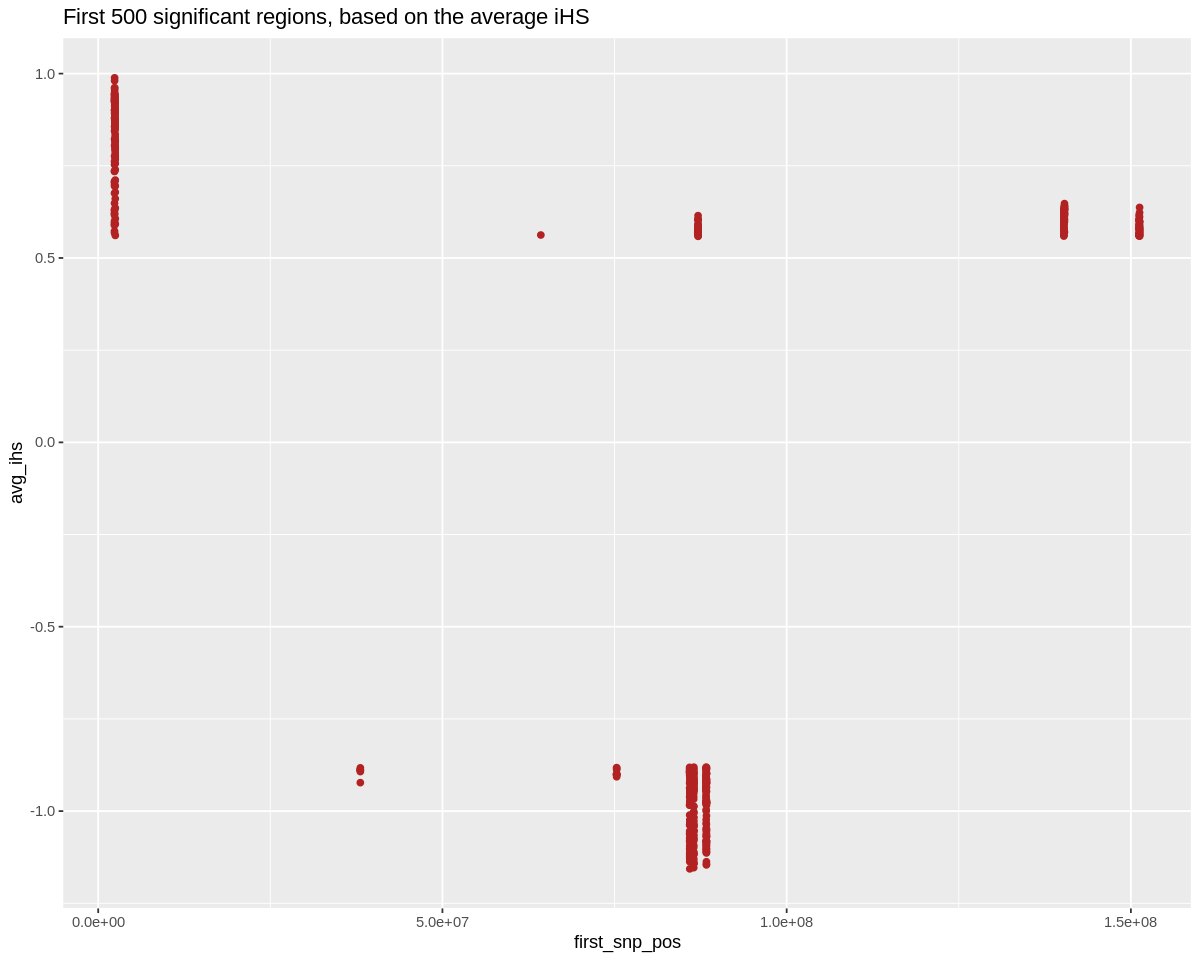

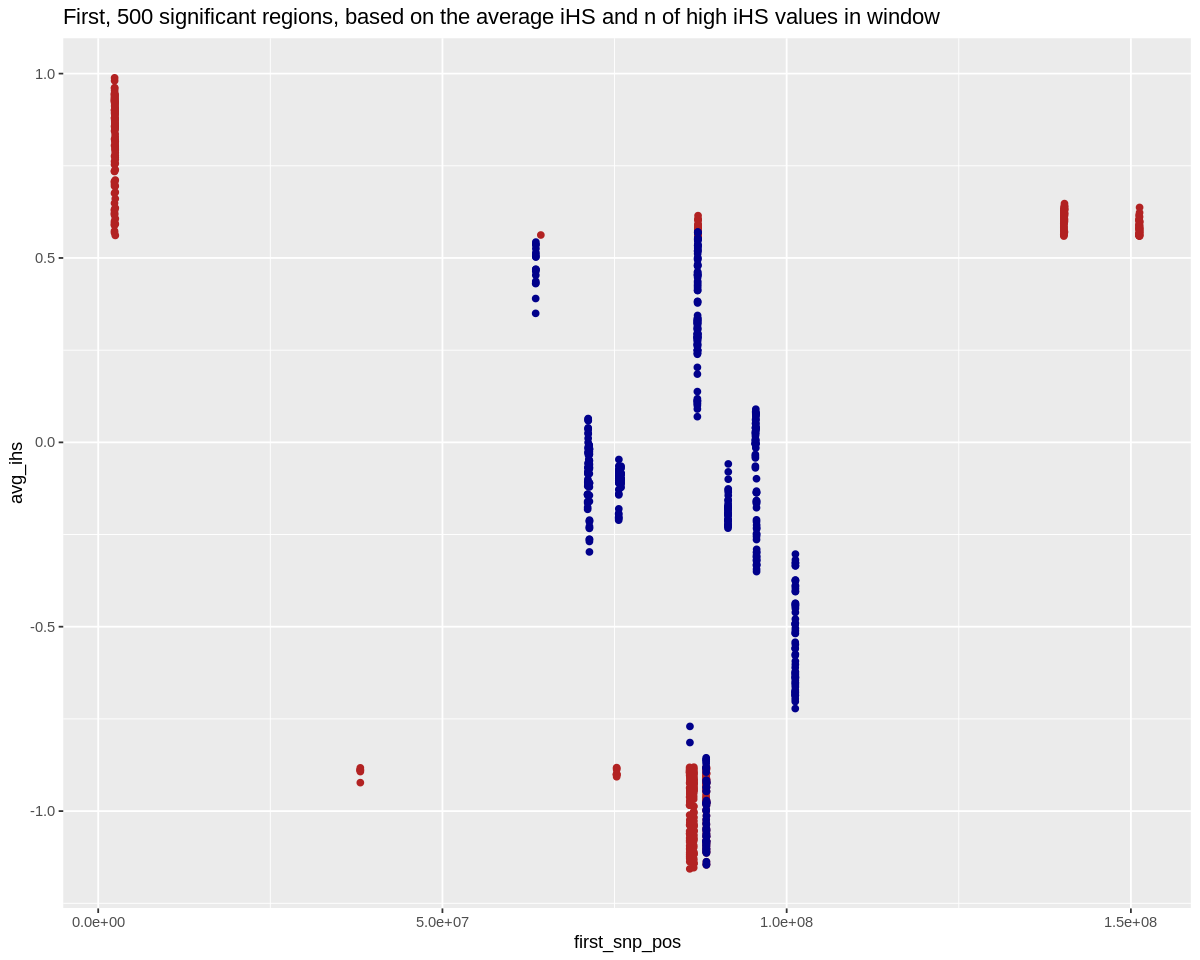

In [18]:
options(repr.plot.width=10, repr.plot.height=8)

windows_ihs_WE <- windows_ihs_WE %>% arrange(desc(avg_ihs))

mean_ihs_WE_high  <- windows_ihs_WE[1:250, ]  
nrow(mean_ihs_WE_high)

mean_ihs_WE_low   <- windows_ihs_WE[(nrow(windows_ihs_WE)-249):nrow(windows_ihs_WE), ]
nrow(mean_ihs_WE_low)
mean_ihs_WE_sign  <- bind_rows(mean_ihs_WE_high, mean_ihs_WE_low)
n = nrow(mean_ihs_WE_sign)
print(n)

#write bed file for annotating genes
mean_ihs_WE_sign <- mean_ihs_WE_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_ihs_WE_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
write_delim(mean_ihs_WE_sign, "mean_ihs_WE_sign_500.bed", delim = "\t", col_names = FALSE)

#find the 500 most significant regions based on the number of absolute iHS values in the window that are higher than 2
windows_ihs_WE <- windows_ihs_WE  %>% arrange(desc(prop_signif))
head(windows_ihs_WE)
nrow(windows_ihs_WE)
prop_signif_ihs_WE_high <- windows_ihs_WE[1:500, ]  

#write bed file for annotating genes
prop_signif_ihs_WE_high <- prop_signif_ihs_WE_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_ihs_WE_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
write_delim(prop_signif_ihs_WE_high, "prop_signif_ihs_WE_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_ihs_WE_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average iHS")

ggplot() + geom_point(data = mean_ihs_WE_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
        geom_point(data = prop_signif_ihs_WE_high, aes(x = first_snp_pos, y = avg_ihs), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average iHS and n of high iHS values in window")



## Annotating genes in the siginficant regions iHS,  WestEurasia

[1] 942

[1] 38

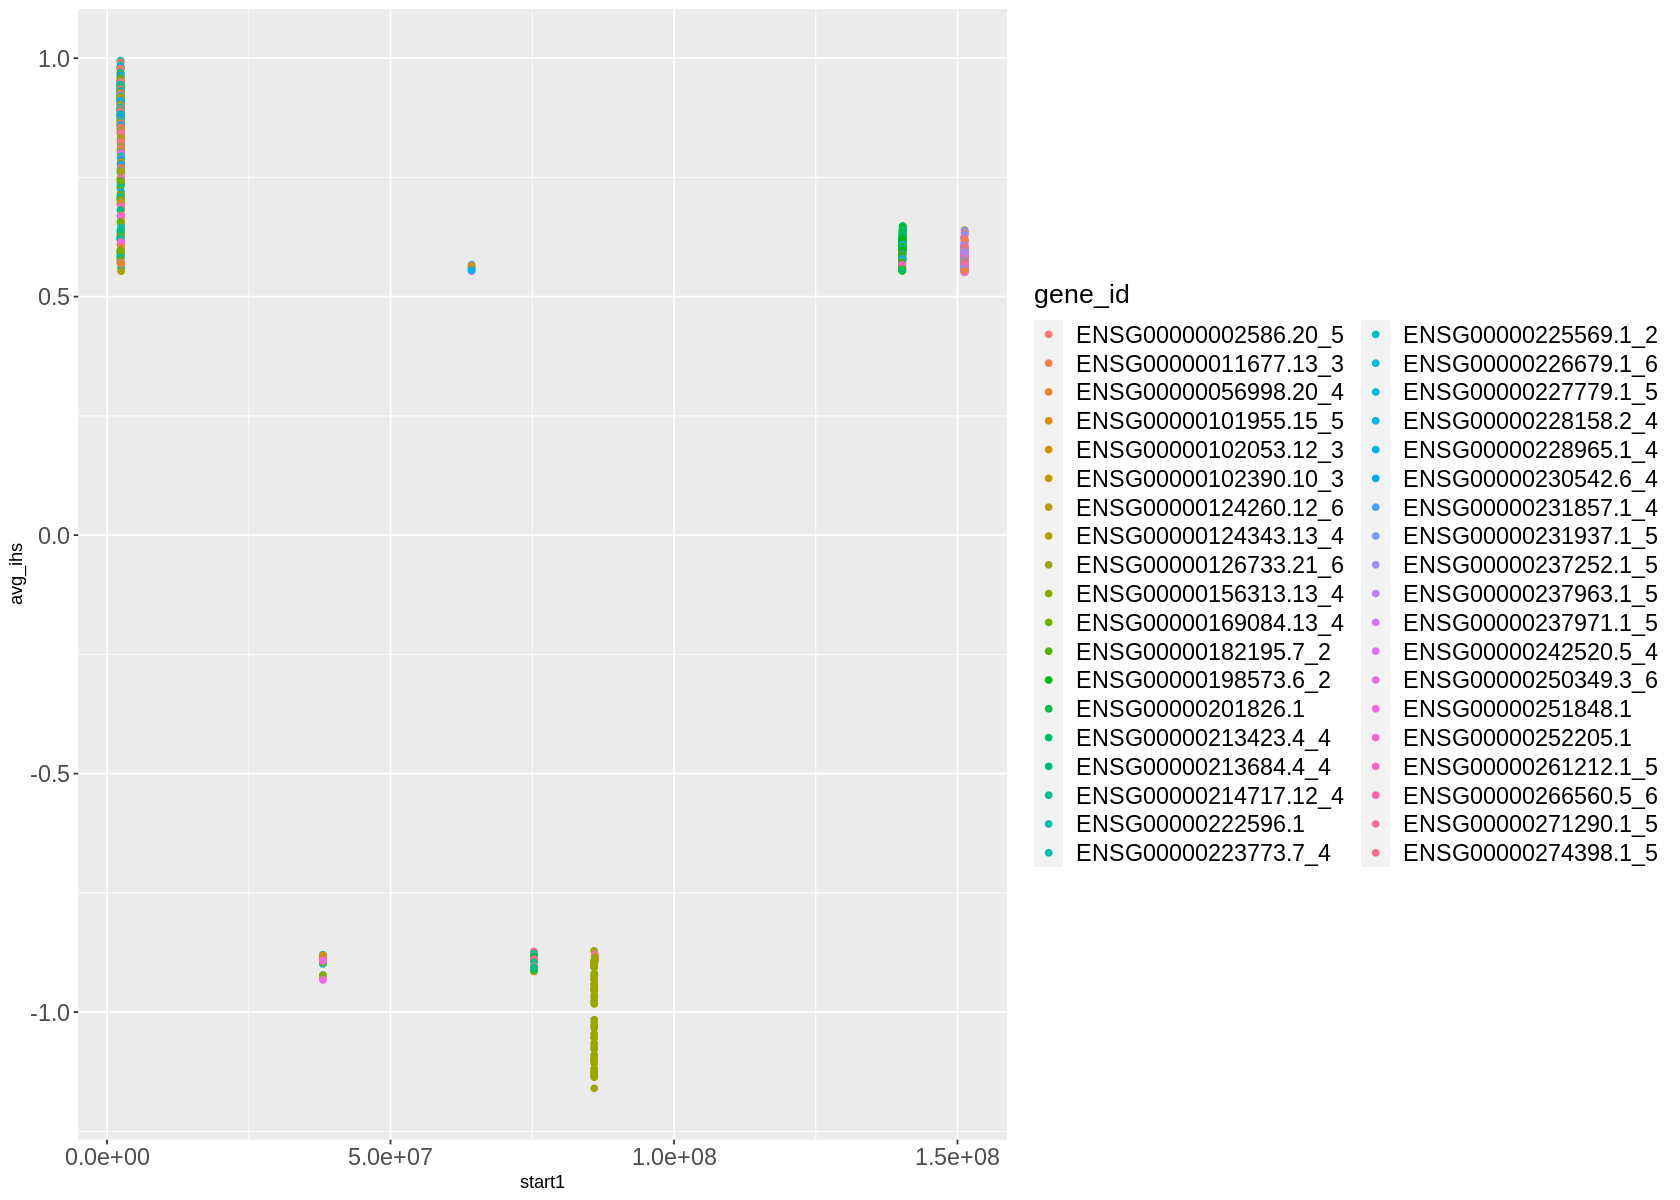

In [19]:
# Based on the mean iHS 

options(repr.plot.width=14, repr.plot.height=10)

mean_ihs_WE_sign_500_genes <- read.table("mean_ihs_WE_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_ihs_WE_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")
mean_ihs_WE_sign_500_genes  <- mean_ihs_WE_sign_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(mean_ihs_WE_sign_500_genes)

ggplot() + geom_jitter(data = mean_ihs_WE_sign_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_WE_mean_ihs  <- (unique(mean_ihs_WE_sign_500_genes[c("gene_id")]))
nrow(gene_names_WE_mean_ihs)

write_delim(gene_names_WE_mean_ihs, "gene_names_WE_mean_ihs.csv", delim = "\t", col_names = TRUE)

[1] 152


[1] 1626

,chr1,start1,end1,prop_signif,avg_ihs,chr2,start2,end2,gene_id,overlap
,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<int>
1,chrX,87058155,87137956,55,0.3306092,chrX,87061432,87061769,ENSG00000270446.1_5,337
2,chrX,87058155,87137956,55,0.3306092,chrX,87062548,87062786,ENSG00000271056.1_5,238
3,chrX,87057313,87137107,54,0.3278967,chrX,87061432,87061769,ENSG00000270446.1_5,337
4,chrX,87057313,87137107,54,0.3278967,chrX,87062548,87062786,ENSG00000271056.1_5,238
5,chrX,87057467,87137478,54,0.3208012,chrX,87061432,87061769,ENSG00000270446.1_5,337
6,chrX,87057467,87137478,54,0.3208012,chrX,87062548,87062786,ENSG00000271056.1_5,238


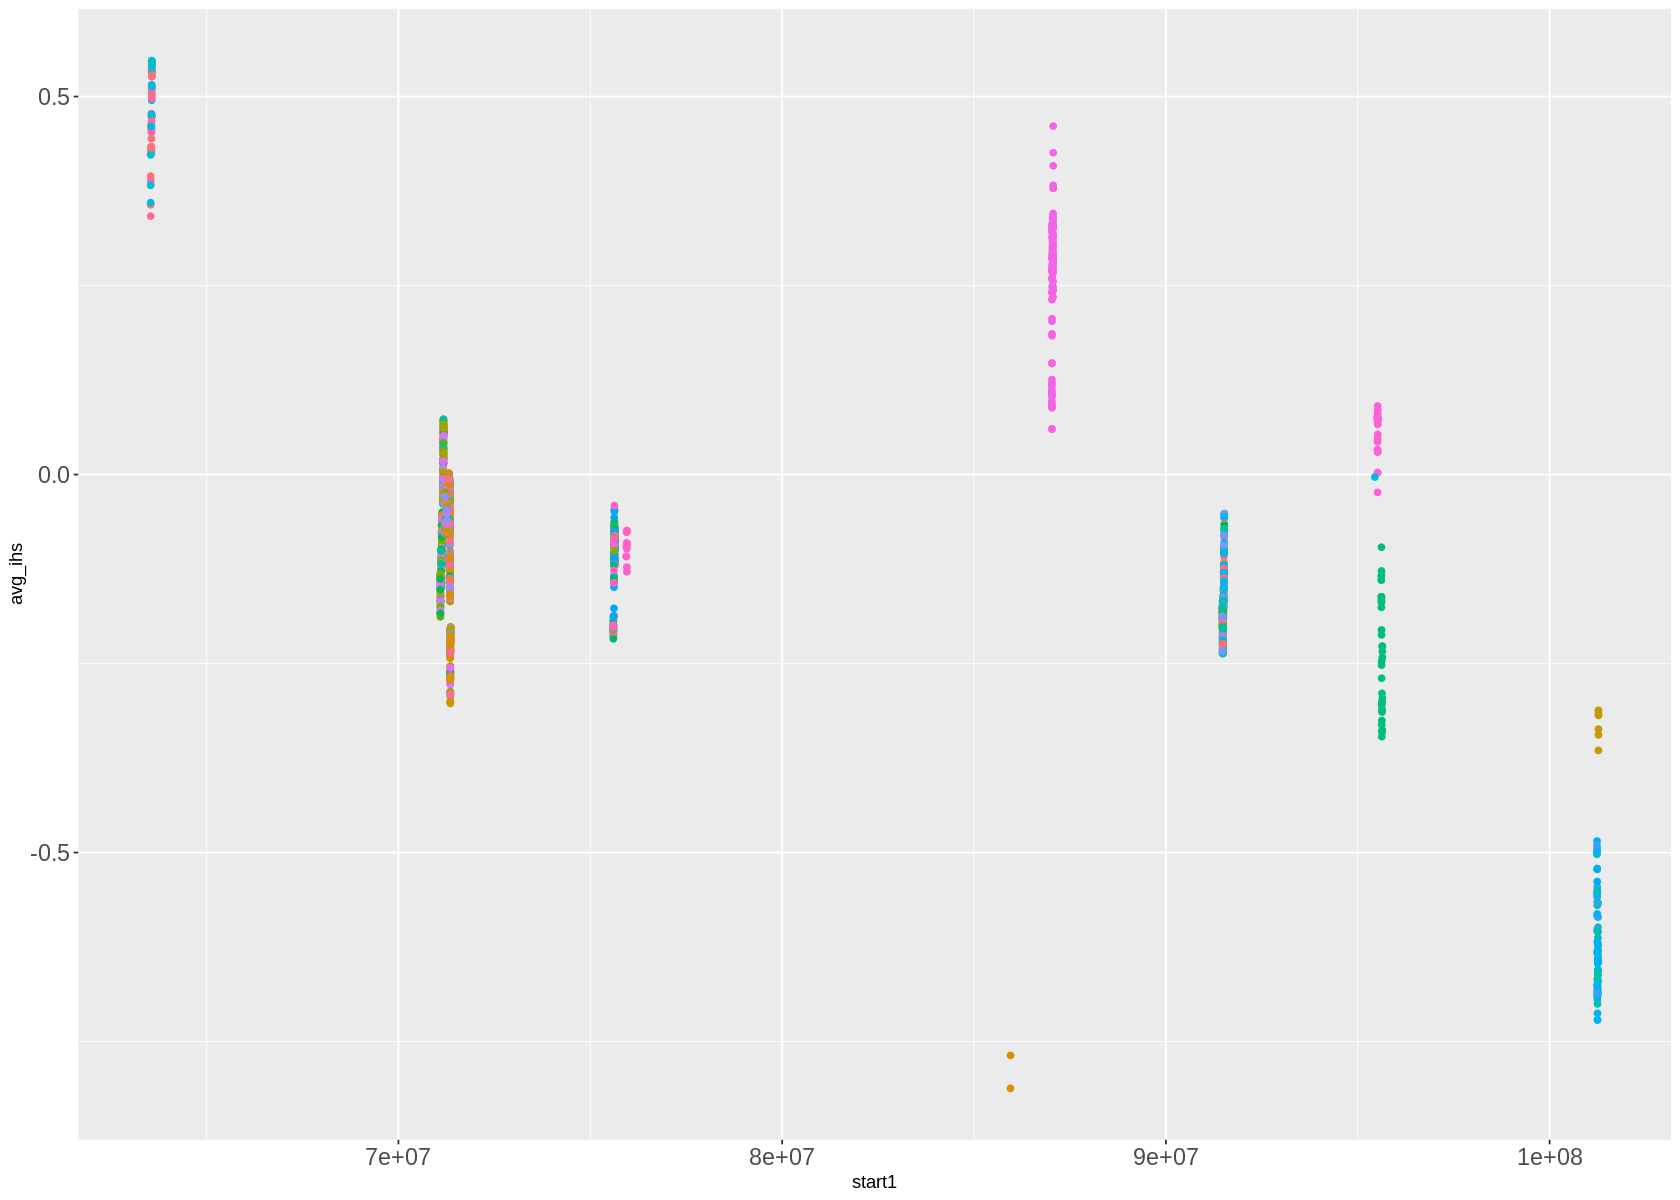

[1] 43

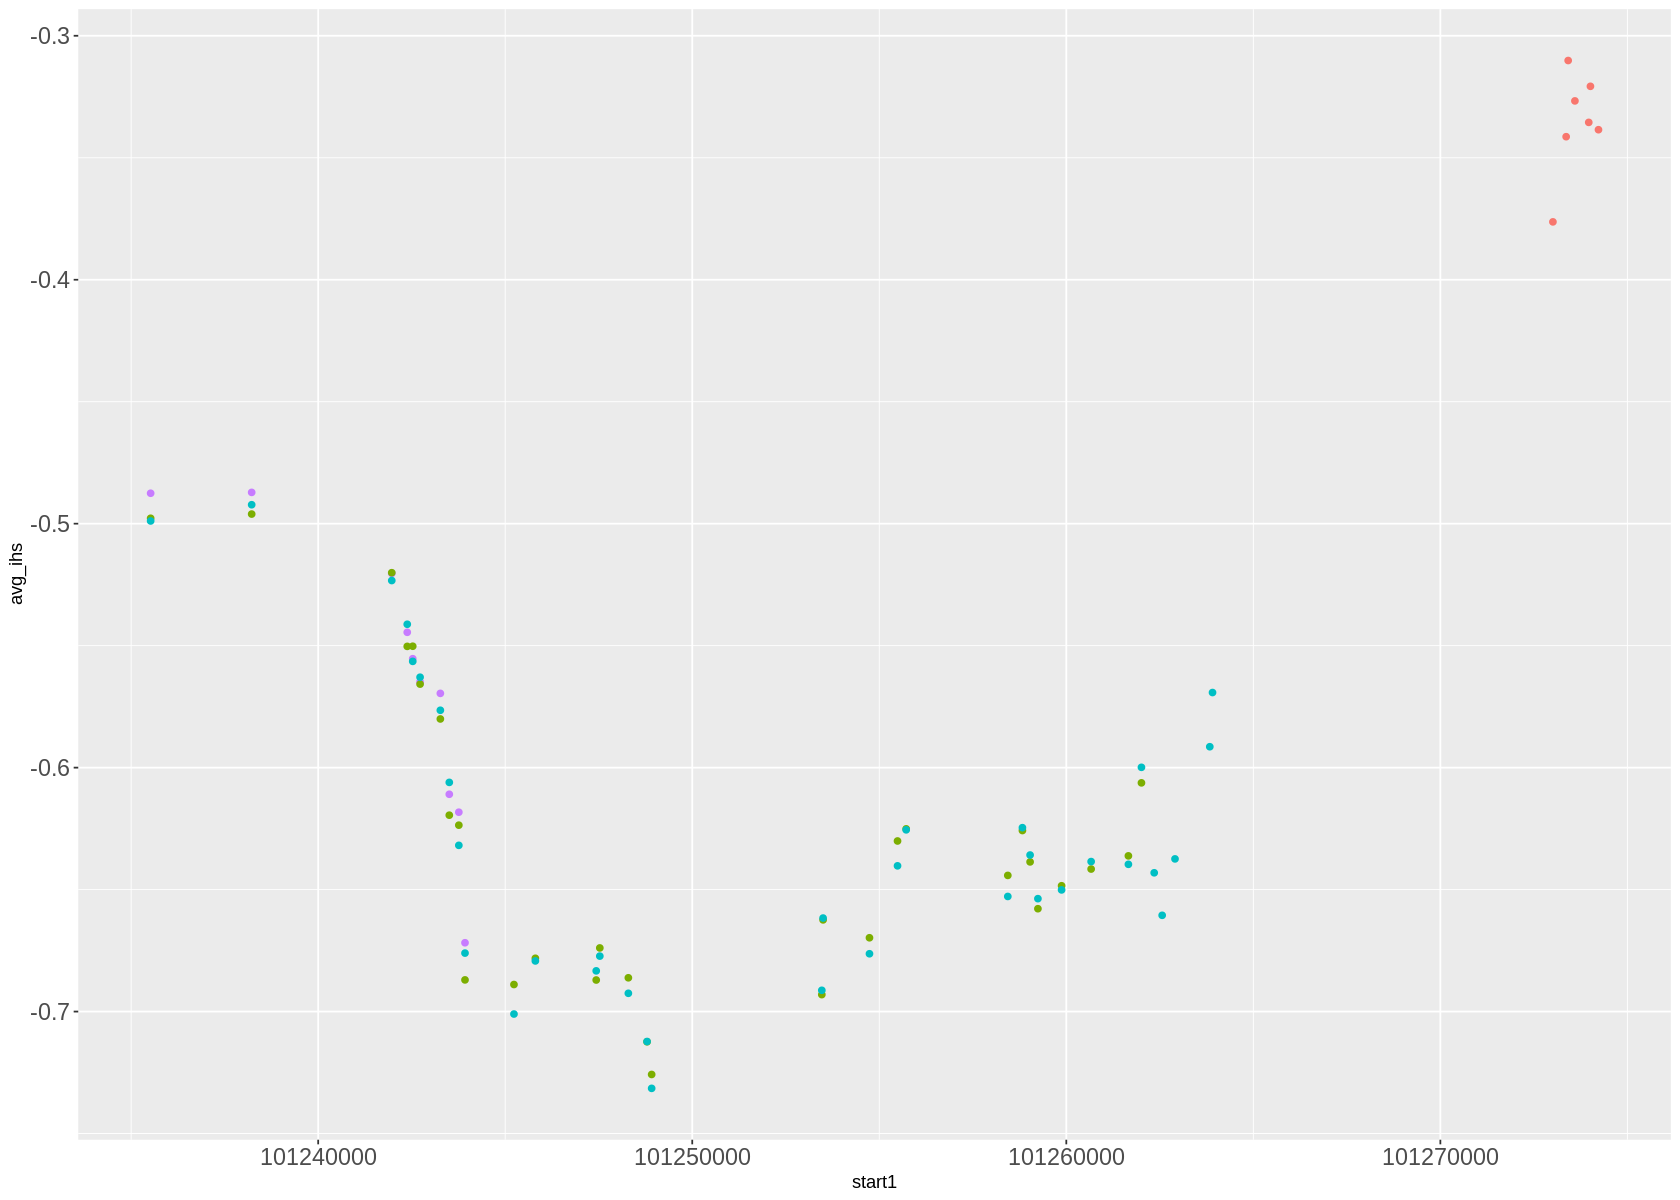

In [48]:
# Based on the number of significant iHS values in window

options(repr.plot.width=14, repr.plot.height=10)

prop_signif_ihs_WE_high_500_genes <- read.table("prop_signif_ihs_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(prop_signif_ihs_WE_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_ihs_WE_high_500_genes  %>% filter(overlap == 0)))

prop_signif_ihs_WE_high_500_genes  <- prop_signif_ihs_WE_high_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)

ggplot() + geom_jitter(data = prop_signif_ihs_WE_high_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

prop_signif_ihs_WE_high_500_genes  %>% filter(start1 > 1e+08)  %>% ggplot() + geom_jitter(aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        ) 

gene_names_WE_n_signif_ihs  <- (unique(prop_signif_ihs_WE_high_500_genes[c("gene_id")]))
nrow(gene_names_WE_n_signif_ihs)

write_delim(gene_names_WE_n_signif_ihs, "gene_names_WE_n_signif_ihs.csv", delim = "\t", col_names = TRUE)

In [25]:
# comparing overlap between genes
intersect(gene_names_WE_mean_ihs, gene_names_WE_n_signif_ihs)

gene_id
<chr>
ENSG00000126733.21_6


## Get genes and genomic coordinates

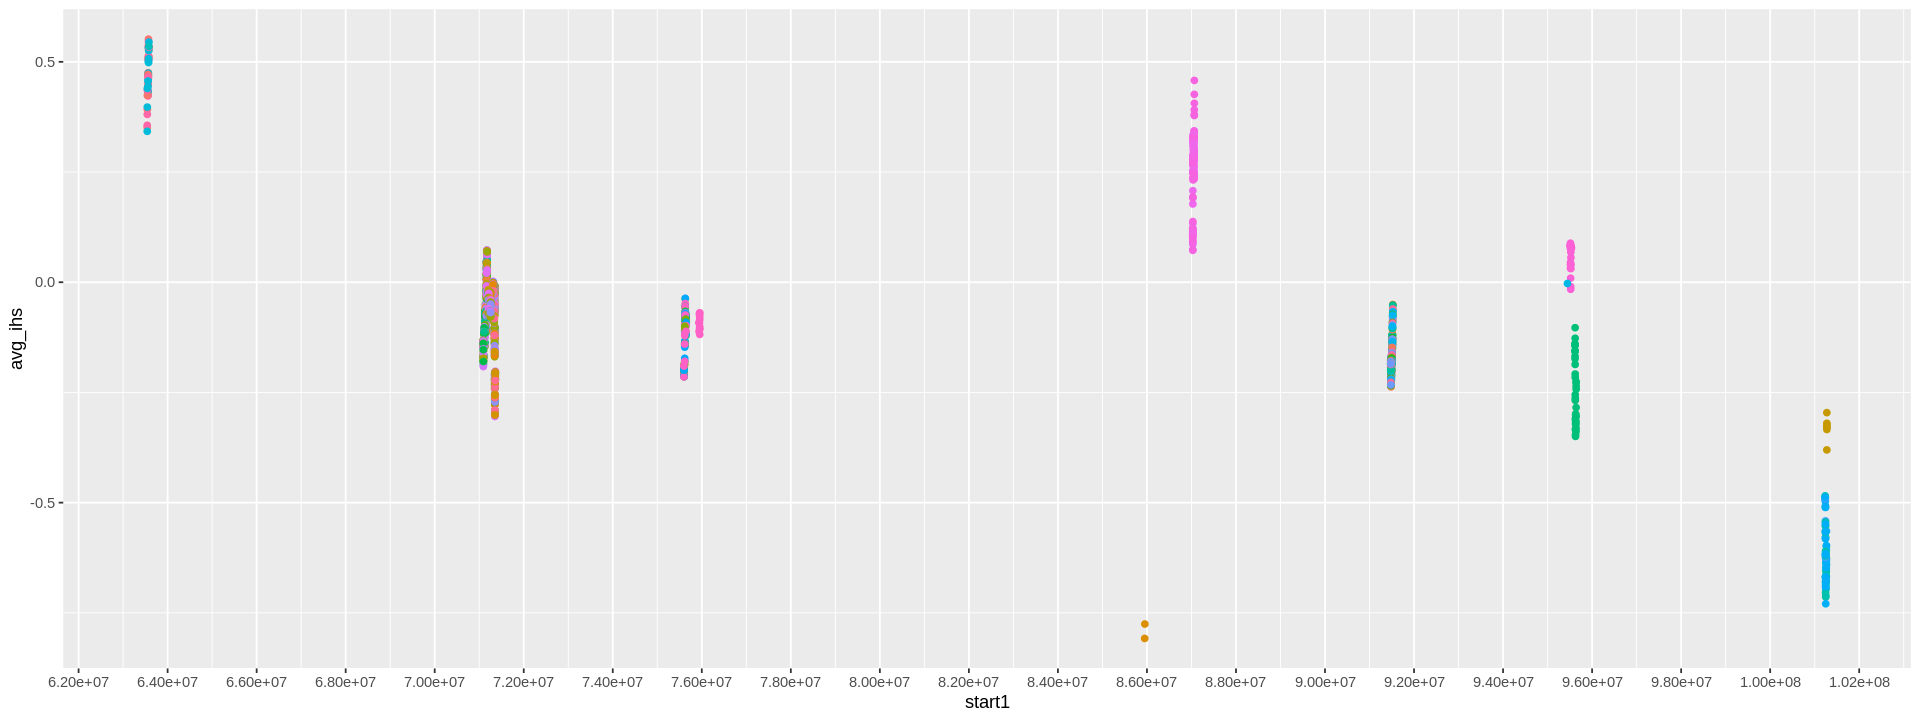

In [64]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot() + 
    geom_jitter(data = prop_signif_ihs_WE_high_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 0.2e+07))

In [65]:
subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 0, 7e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 7e+07, 7.5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 7.5e+07, 8e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 8e+07, 8.65e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 8.65e+07, 8.8e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 8.8e+07, 9.4e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1, 9.4e+07, 9.8e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_WE_high_500_genes  %>% filter(between(start1,  9.8e+07, 1.02e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

[1] 63542142 63832930


,gene_id
,<chr>
1,ENSG00000102043.16_4
2,ENSG00000283349.3_5
3,ENSG00000230889.2_4
52,ENSG00000227261.1_4


[1] 71088464 71575400


,gene_id
,<chr>
1,ENSG00000201392.1
2,ENSG00000204131.9_5
3,ENSG00000196933.5_2
4,ENSG00000242732.4_5
5,ENSG00000248345.1
6,ENSG00000215933.1
7,ENSG00000225471.5_5
8,ENSG00000102309.13_5
47,ENSG00000239577.2


[1] 75599255 76023458


,gene_id
,<chr>
1,ENSG00000198934.4_3
2,ENSG00000223259.1_1
3,ENSG00000235447.2_4
4,ENSG00000280870.2_3


[1] 85948703 86024117


,gene_id
,<chr>
1,ENSG00000126733.21_6


[1] 87028701 87144319


,gene_id
,<chr>
1,ENSG00000270446.1_5
2,ENSG00000271056.1_5


[1] 91477303 92517724


,gene_id
,<chr>
1,ENSG00000102290.22_3
2,ENSG00000215089.3_4
3,ENSG00000211526.1
4,ENSG00000230543.1_4
5,ENSG00000225912.1_5
6,ENSG00000285445.1_3
7,ENSG00000237873.1_5
8,ENSG00000234130.2_5


[1] 95446841 95778746


,gene_id
,<chr>
1,ENSG00000271209.1_4
2,ENSG00000223260.1
45,ENSG00000232069.1_4


[1] 101235521 101394641


,gene_id
,<chr>
1,ENSG00000226119.1_5
2,ENSG00000234901.1_4
46,ENSG00000235976.2_5
58,ENSG00000184905.9_4


## Analyze significant iHS values EastAsia

[1] 250

[1] 250

[1] 500


,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,X,101255719,101798148,78,-0.4402178
2,X,101255586,101795776,78,-0.4500572
3,X,101254738,101794242,77,-0.4225975
4,X,101257596,101805097,77,-0.4650591
5,X,101258827,101806677,77,-0.4761891
6,X,101248915,101793294,76,-0.4066255


[1] 68663

,chr,first_snp_pos,last_snp_pos,prop_signif,avg_ihs
,<chr>,<int>,<int>,<int>,<dbl>
1,chrX,101255719,101798148,78,-0.4402178
2,chrX,101255586,101795776,78,-0.4500572
3,chrX,101254738,101794242,77,-0.4225975
4,chrX,101257596,101805097,77,-0.4650591
5,chrX,101258827,101806677,77,-0.4761891
6,chrX,101248915,101793294,76,-0.4066255


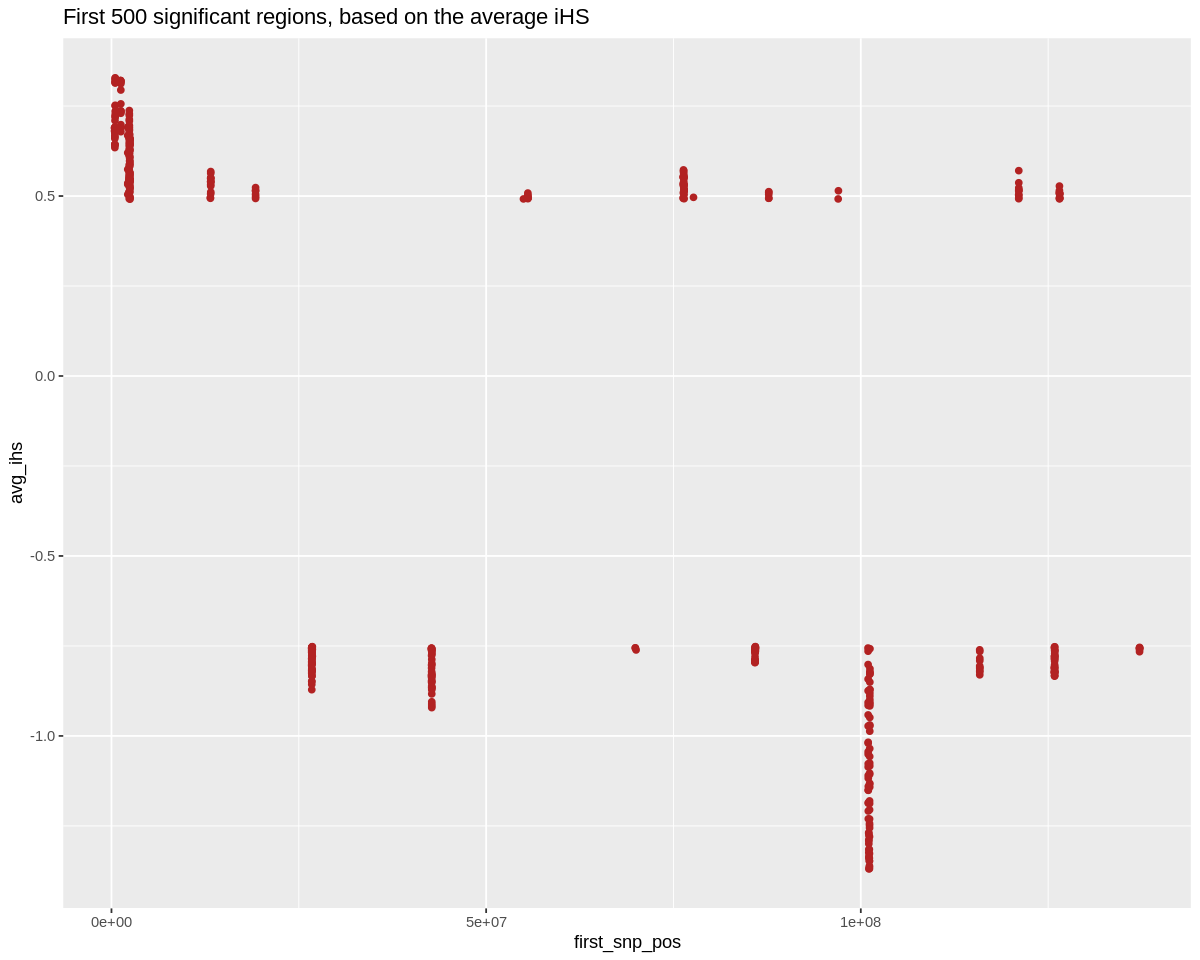

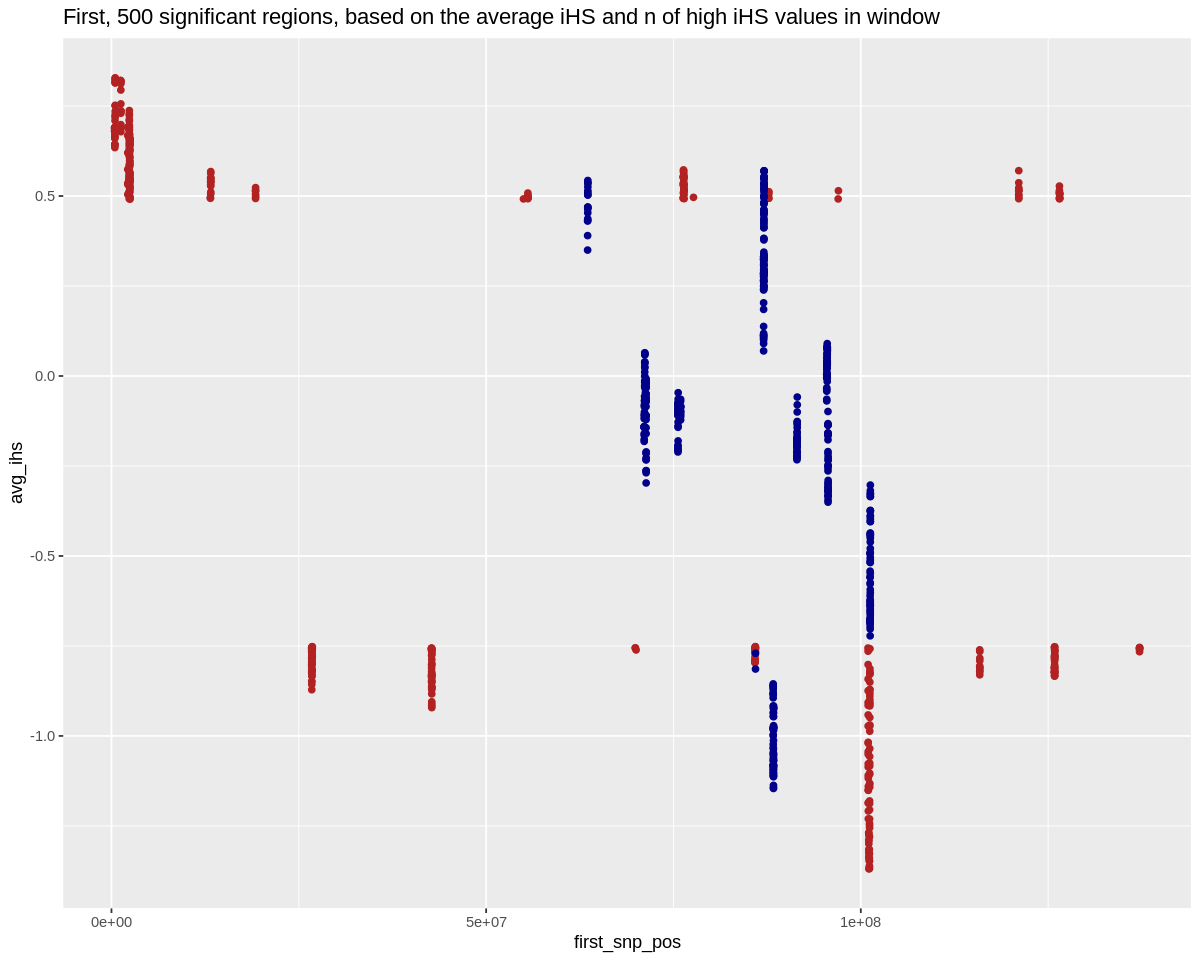

In [46]:
options(repr.plot.width=10, repr.plot.height=8)

windows_ihs_EA <- windows_ihs_EA %>% arrange(desc(avg_ihs))

mean_ihs_EA_high  <- windows_ihs_EA[1:250, ]  
nrow(mean_ihs_EA_high)

mean_ihs_EA_low   <- windows_ihs_EA[(nrow(windows_ihs_EA)-249):nrow(windows_ihs_EA), ]
nrow(mean_ihs_EA_low)
mean_ihs_EA_sign  <- bind_rows(mean_ihs_EA_high, mean_ihs_EA_low)
n = nrow(mean_ihs_EA_sign)
print(n)

#write bed file for annotating genes
mean_ihs_EA_sign <- mean_ihs_EA_sign  %>% 
                                mutate(chr = rep("chrX", nrow(mean_ihs_EA_sign)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
write_delim(mean_ihs_EA_sign, "mean_ihs_EA_sign_500.bed", delim = "\t", col_names = FALSE)

#find the 500 most significant regions based on the number of absolute iHS values in the window that are higher than 2
windows_ihs_EA <- windows_ihs_EA  %>% arrange(desc(prop_signif))
head(windows_ihs_EA)
nrow(windows_ihs_EA)
prop_signif_ihs_EA_high <- windows_ihs_EA[1:500, ]  

#write bed file for annotating genes
prop_signif_ihs_EA_high <- prop_signif_ihs_EA_high  %>% 
                                mutate(chr = rep("chrX", nrow(prop_signif_ihs_EA_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, prop_signif, avg_ihs)
head(prop_signif_ihs_EA_high)
write_delim(prop_signif_ihs_EA_high, "prop_signif_ihs_EA_high_500.bed", delim = "\t", col_names = FALSE)


# plotting the significant regions in both cases
ggplot() + geom_point(data = mean_ihs_EA_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
            ggtitle("First 500 significant regions, based on the average iHS")

ggplot() + geom_point(data = mean_ihs_EA_sign, aes(x = first_snp_pos, y = avg_ihs), color = "firebrick") + 
        geom_point(data = prop_signif_ihs_WE_high, aes(x = first_snp_pos, y = avg_ihs), color = "darkblue") + 
        ggtitle("First, 500 significant regions, based on the average iHS and n of high iHS values in window")



## Annotating genes in the siginficant regions iHS,  EastAsia

[1] 2687

[1] 128

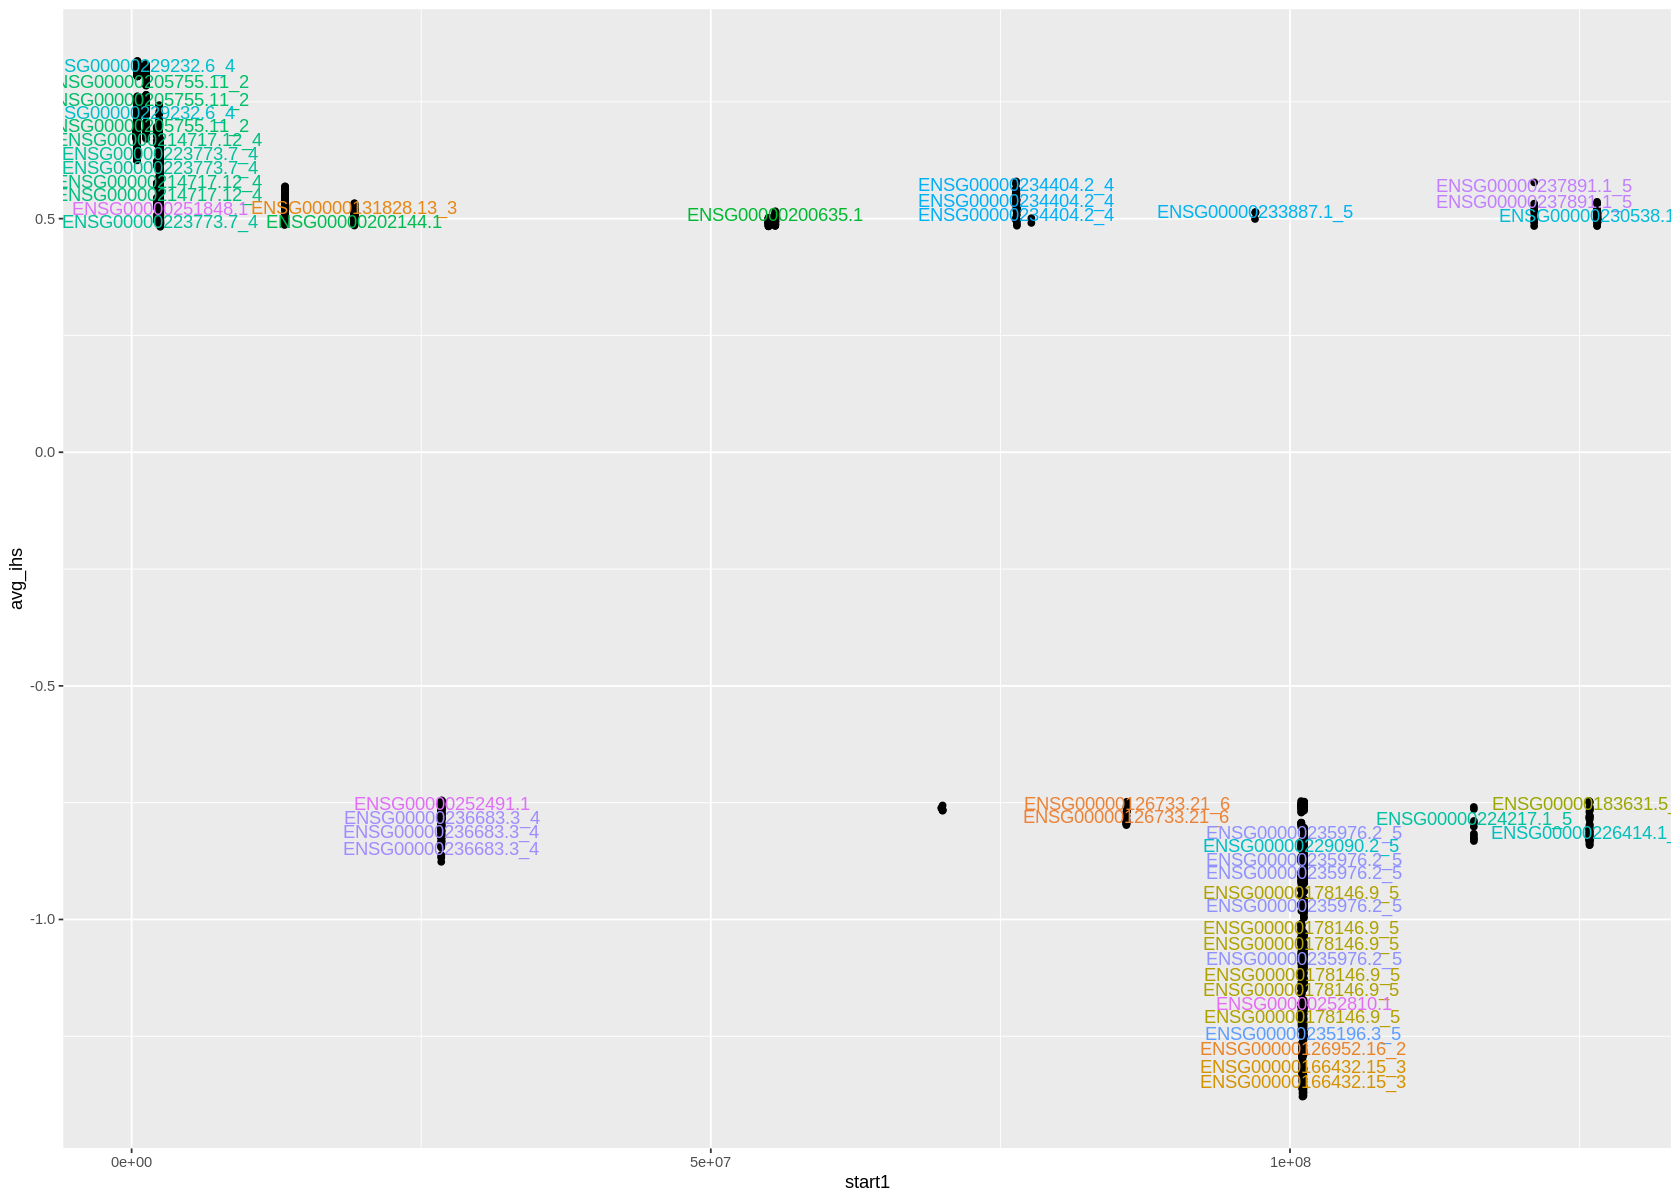

In [22]:
# Based on the mean iHS 

options(repr.plot.width=14, repr.plot.height=10)

mean_ihs_EA_sign_500_genes <- read.table("mean_ihs_EA_sign_500_genes.bed", header = FALSE, sep = '\t')
colnames(mean_ihs_EA_sign_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")


mean_ihs_EA_sign_500_genes  <- mean_ihs_EA_sign_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(mean_ihs_EA_sign_500_genes)

#ggplot() + geom_jitter(data = mean_ihs_EA_sign_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01) +
#    theme(
#        legend.title = element_text(size = 16),
#        legend.text = element_text(size = 14), 
#        axis.text.x = element_text(size = 14), 
#        axis.text.y = element_text(size = 14)
#        )

ggplot() + geom_jitter(data = mean_ihs_EA_sign_500_genes, aes(x = start1, y = avg_ihs), width = 0.001, height = 0.01) +
    geom_text(data = mean_ihs_EA_sign_500_genes, aes(x = start1, y = avg_ihs, label = gene_id, color = gene_id), show.legend = FALSE,  check_overlap = TRUE)


gene_names_EA_mean_ihs  <- (unique(mean_ihs_EA_sign_500_genes[c("gene_id")]))
nrow(gene_names_EA_mean_ihs)

write_delim(gene_names_EA_mean_ihs, "gene_names_EA_mean_ihs.csv", delim = "\t", col_names = TRUE)

[1] 85962

[1] 79


[1] 3290

[1] 145

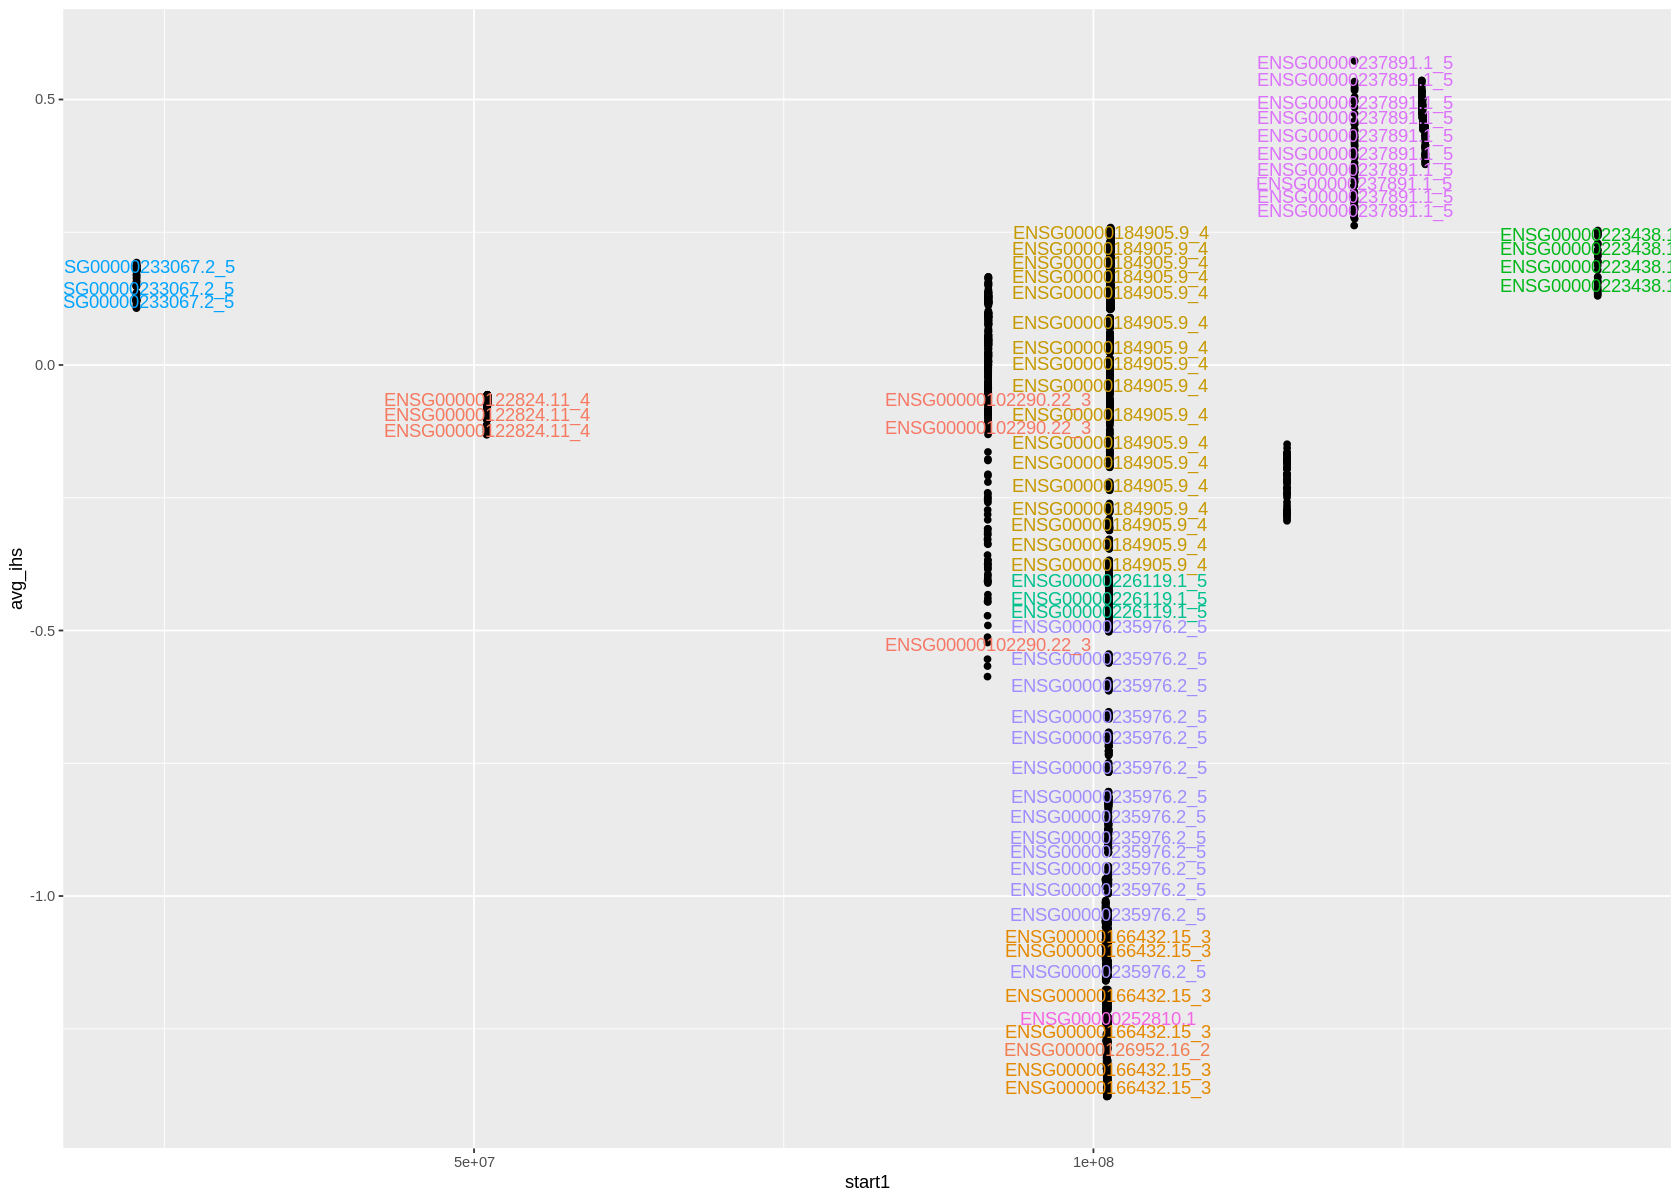

In [45]:
# Based on the number of significant iHS values in window

options(repr.plot.width=14, repr.plot.height=10)

prop_signif_ihs_EA_high_500_genes <- read.table("prop_signif_ihs_EA_high_500_genes.bed", header = FALSE, sep = '\t')B 
colnames(prop_signif_ihs_EA_high_500_genes)  <- c("chr1", "start1", "end1", "prop_signif", "avg_ihs", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(prop_signif_ihs_EA_high_500_genes  %>% filter(overlap == 0)))

prop_signif_ihs_EA_high_500_genes  <- prop_signif_ihs_EA_high_500_genes %>% filter(overlap != 0)  %>% distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(prop_signif_ihs_EA_high_500_genes)

ggplot() + geom_jitter(data = prop_signif_ihs_EA_high_500_genes, aes(x = start1, y = avg_ihs), width = 0.001, height = 0.01) +
    geom_text(data = prop_signif_ihs_EA_high_500_genes, aes(x = start1, y = avg_ihs, label = gene_id, color = gene_id), show.legend = FALSE,  check_overlap = TRUE)


gene_names_EA_n_signif_ihs  <- (unique(prop_signif_ihs_EA_high_500_genes[c("gene_id")]))
nrow(gene_names_EA_n_signif_ihs)


write_delim(gene_names_EA_n_signif_ihs, "gene_names_EA_n_signif_ihs.csv", delim = "\t", col_names = TRUE)

In [31]:
# comparing overlap between genes
intersect(gene_names_EA_mean_ihs, gene_names_EA_n_signif_ihs)

gene_id
<chr>
ENSG00000237891.1_5
ENSG00000230538.1_5
ENSG00000280275.1_5
ENSG00000274631.1_5
ENSG00000235274.1_5
ENSG00000260683.1_5
ENSG00000178146.9_5
ENSG00000126952.16_2
ENSG00000166432.15_3


## Get genes and genomic coordinates

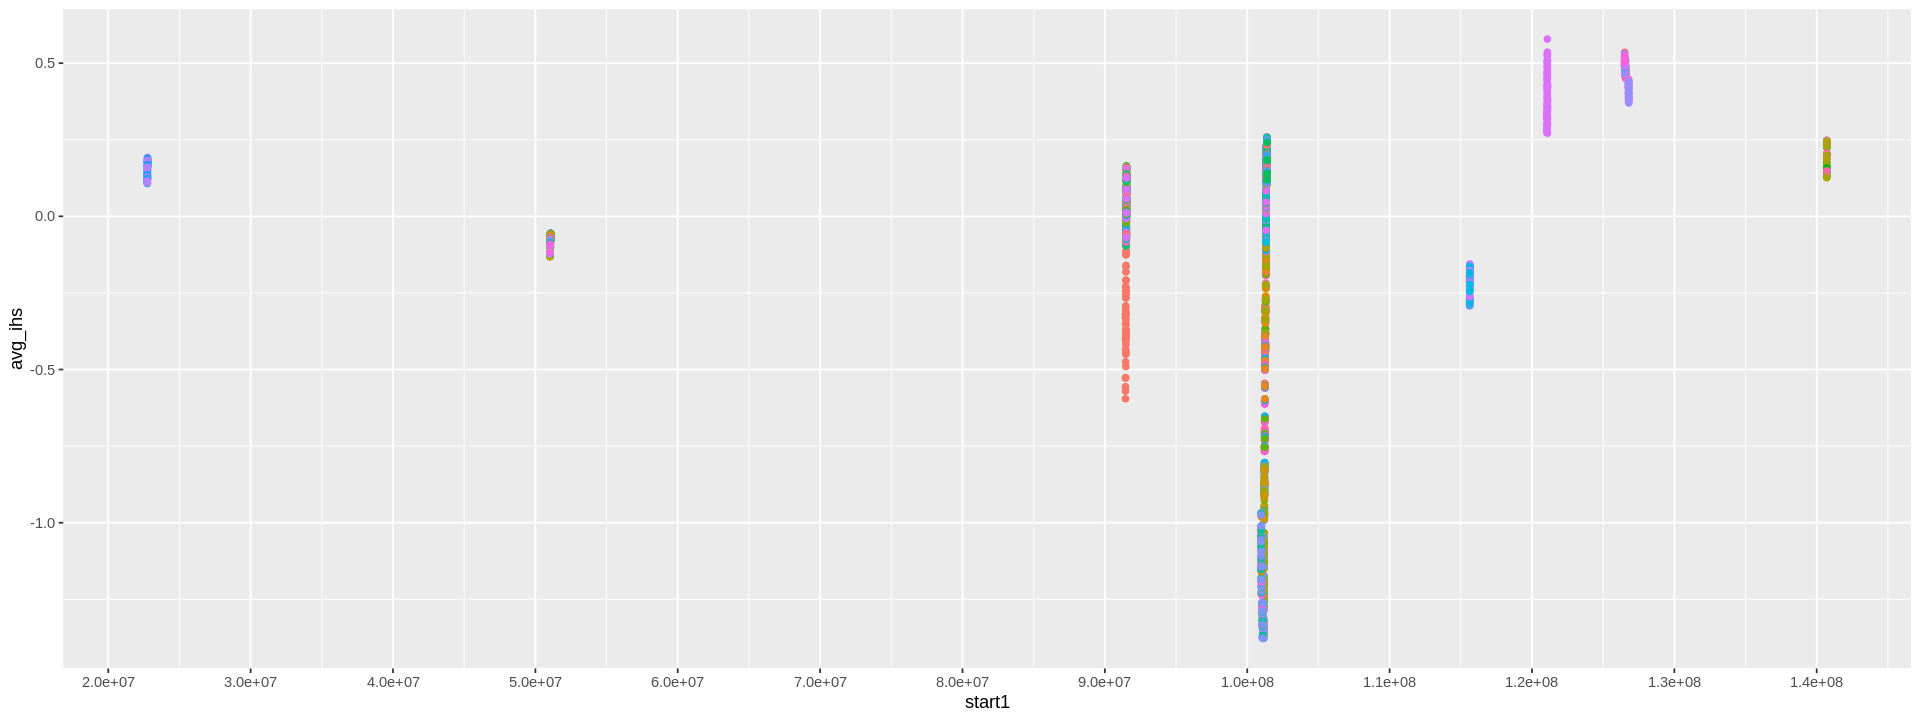

In [68]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot() + 
    geom_jitter(data = prop_signif_ihs_EA_high_500_genes, aes(x = start1, y = avg_ihs, color = gene_id), width = 0.001, height = 0.01, show.legend = FALSE) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))

In [69]:
subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 0, 4e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 4e+07, 7e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 7e+07, 9.5e+07))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 9.5e+07, 1.1e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 1.1e+08, 1.2e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 1.2e+08, 1.25e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1, 1.25e+08, 1.3e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

subset  <- prop_signif_ihs_EA_high_500_genes  %>% filter(between(start1,  1.3e+08, 1.45e+08))
print(get_coords(subset))
(unique(subset[c("gene_id")]))

[1] 22737423 22832154


,gene_id
,<chr>
1,ENSG00000233067.2_5
2,ENSG00000237019.1_5


[1] 51020452 52896415


,gene_id
,<chr>
1,ENSG00000122824.11_4
2,ENSG00000229151.1_5
3,ENSG00000226530.1_6
4,ENSG00000187690.4_5
5,ENSG00000196368.5_4
6,ENSG00000234766.1_5
7,ENSG00000224109.3_6
8,ENSG00000283093.1_6
9,ENSG00000227997.3


[1] 91448235 92458919


,gene_id
,<chr>
1,ENSG00000102290.22_3
7,ENSG00000215089.3_4
8,ENSG00000211526.1
9,ENSG00000230543.1_4
10,ENSG00000225912.1_5
11,ENSG00000285445.1_3
12,ENSG00000237873.1_5


[1] 100982827 102312316


,gene_id
,<chr>
1,ENSG00000226119.1_5
2,ENSG00000234901.1_4
3,ENSG00000184905.9_4
4,ENSG00000204071.10_3
5,ENSG00000184515.11_3
6,ENSG00000251525.6_4
7,ENSG00000268235.7_3
8,ENSG00000269405.6_2
9,ENSG00000273746.1_5


[1] 115624472 115879323


,gene_id
,<chr>
1,ENSG00000236077.2_5
2,ENSG00000237860.1_5
3,ENSG00000230159.1_5


[1] 121033756 121253024


,gene_id
,<chr>
1,ENSG00000237891.1_5


[1] 126506738 126908692


,gene_id
,<chr>
1,ENSG00000274631.1_5
2,ENSG00000235274.1_5
3,ENSG00000260683.1_5
62,ENSG00000230538.1_5
63,ENSG00000280275.1_5


[1] 140705793 140811605


,gene_id
,<chr>
1,ENSG00000223438.1_6
2,ENSG00000277215.1_5
3,ENSG00000196406.4_2


## Summarising plot for the report

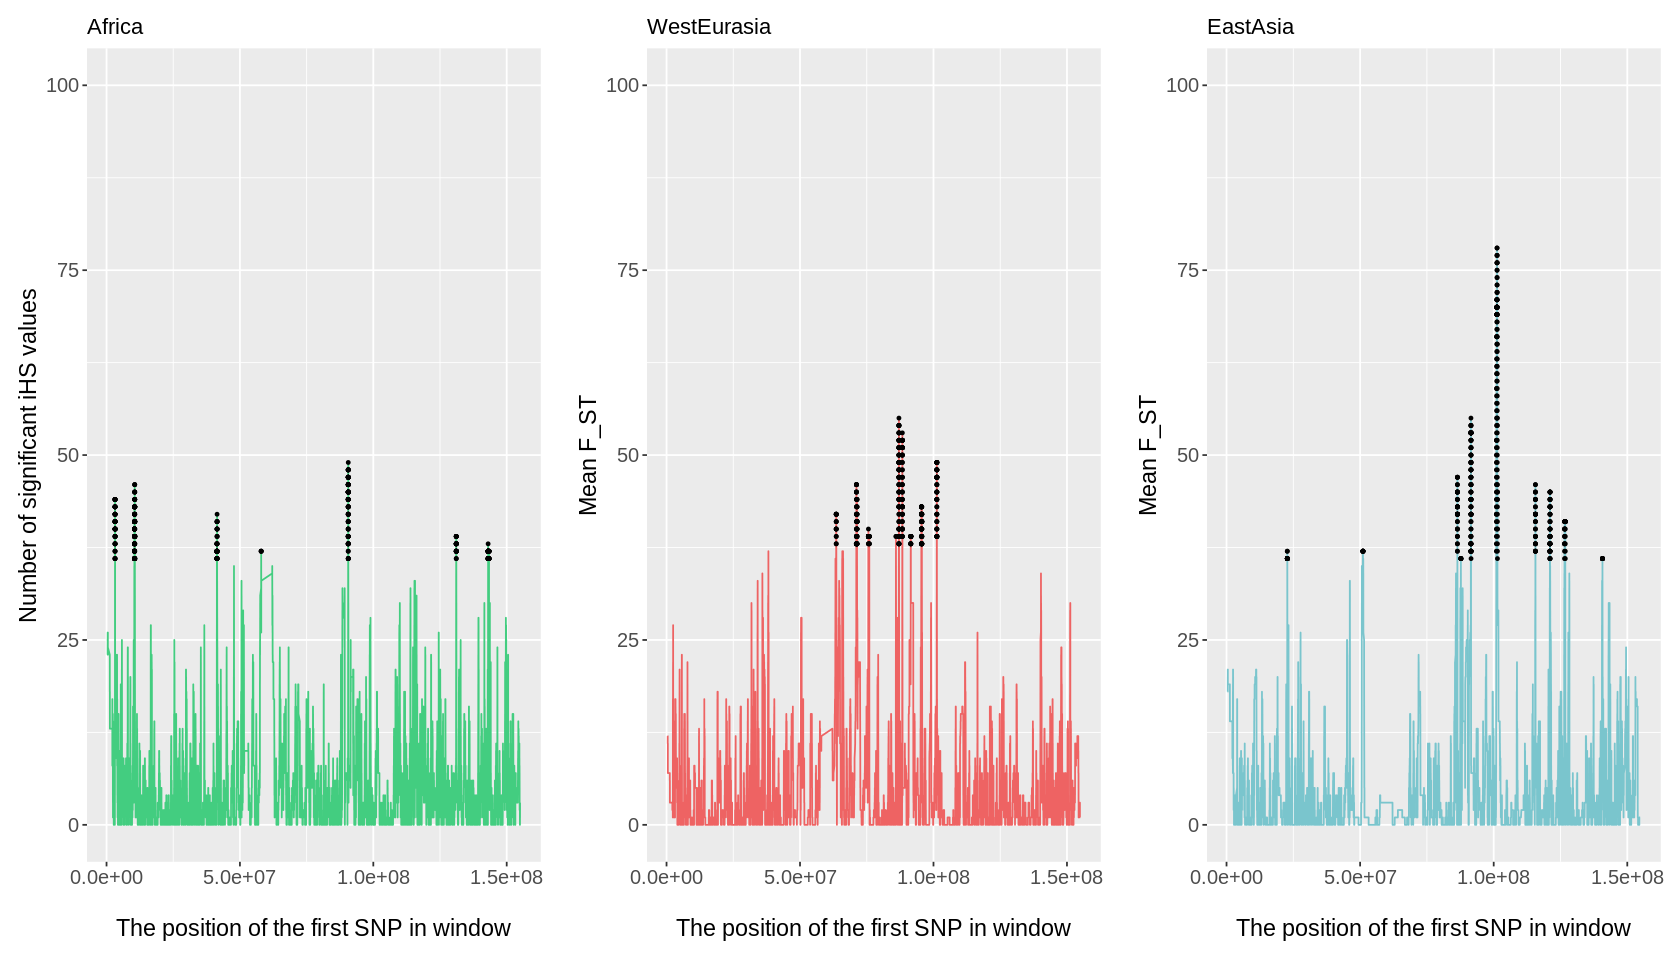

In [27]:
options(repr.plot.width=14, repr.plot.height=8)



AF_plot  <- ggplot() + 
    geom_line(data = windows_ihs_AF, aes(x = first_snp_pos, y = prop_signif), color = "seagreen3", show.legend = F) + 
    geom_point(data = prop_signif_ihs_AF_high, aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("Africa") + ylim(0, 100) + xlab("\nThe position of the first SNP in window") + ylab("Number of significant iHS values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

WE_plot  <- ggplot() + 
    geom_line(data = windows_ihs_WE, aes(x = first_snp_pos, y = prop_signif), color = "indianred2", show.legend = F) + 
    geom_point(data = prop_signif_ihs_WE_high, aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("WestEurasia") + ylim(0, 100) + xlab("\nThe position of the first SNP in window") + ylab("Number of significant iHS values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

EA_plot  <- ggplot() + 
    geom_line(data = windows_ihs_EA, aes(x = first_snp_pos, y = prop_signif), color = "cadetblue3", show.legend = F) + 
    geom_point(data = prop_signif_ihs_EA_high , aes(x = first_snp_pos, y = prop_signif), size = 0.7) + 
    ggtitle("EastAsia") + ylim(0, 100) + xlab("\nThe position of the first SNP in window") + ylab("Number of significant iHS values") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

mm <- theme(plot.margin=unit(rep(0.8,4), "line"))
gridExtra::grid.arrange(AF_plot+mm, WE_plot +mm, EA_plot +mm,ncol=3)


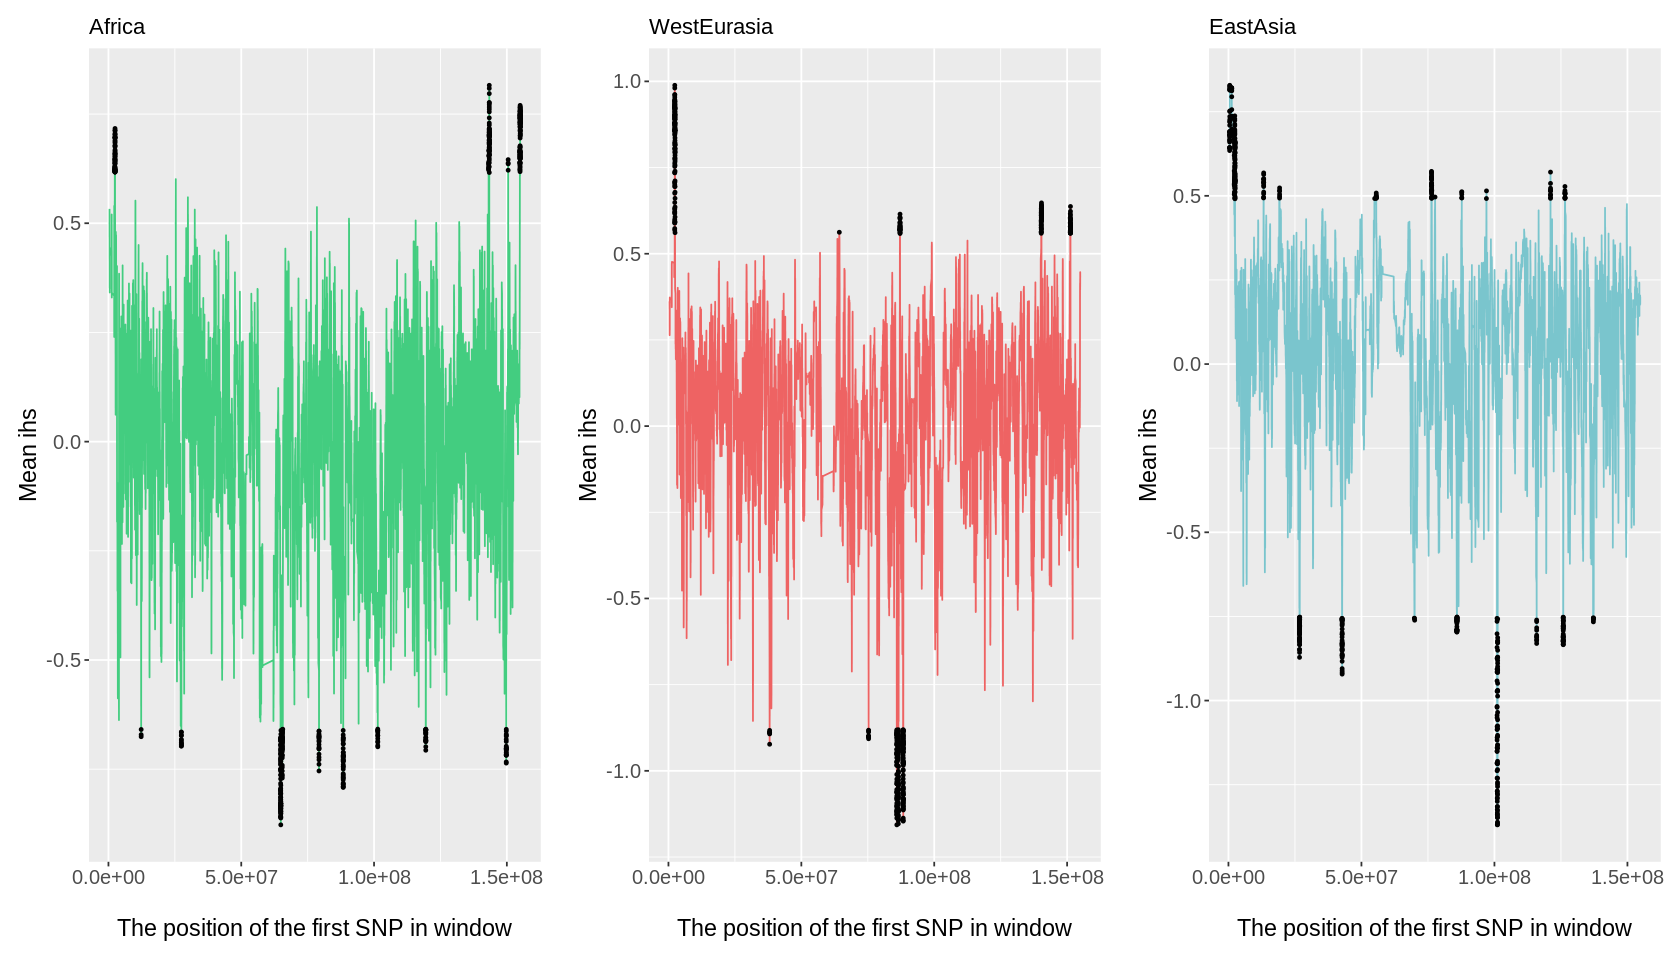

In [29]:
options(repr.plot.width=14, repr.plot.height=8)



AF_plot  <- ggplot() + 
    geom_line(data = windows_ihs_AF, aes(x = first_snp_pos, y = avg_ihs), color = "seagreen3", show.legend = F) + 
    geom_point(data = mean_ihs_AF_sign, aes(x = first_snp_pos, y = avg_ihs), size = 0.7) + 
    ggtitle("Africa")  + xlab("\nThe position of the first SNP in window") + ylab("Mean ihs") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

WE_plot  <- ggplot() + 
    geom_line(data = windows_ihs_WE, aes(x = first_snp_pos, y = avg_ihs), color = "indianred2", show.legend = F) + 
    geom_point(data = mean_ihs_WE_sign, aes(x = first_snp_pos, y = avg_ihs), size = 0.7) + 
    ggtitle("WestEurasia")+ xlab("\nThe position of the first SNP in window") + ylab("Mean ihs") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

EA_plot  <- ggplot() + 
    geom_line(data = windows_ihs_EA, aes(x = first_snp_pos, y = avg_ihs), color = "cadetblue3", show.legend = F) + 
    geom_point(data = mean_ihs_EA_sign , aes(x = first_snp_pos, y = avg_ihs), size = 0.7) + 
    ggtitle("EastAsia") + xlab("\nThe position of the first SNP in window") + ylab("Mean ihs") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

mm <- theme(plot.margin=unit(rep(0.8,4), "line"))
gridExtra::grid.arrange(AF_plot+mm, WE_plot +mm, EA_plot +mm,ncol=3)